In [1]:
!pip install pykalman

from sklearn.linear_model import LinearRegression 
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt

from Library import coor_bounding_box_95
from Library import load_datasets
from Library import eth_data_manager
from Library import eth_model_manager
from Library import print_results
from Library import coor_deviation
from Library import add_to_result_df
from sklearn.linear_model import Ridge
from Library import get_best_model_list
from Library import print_boxes

In [2]:
trajs,trajs_hotel = load_datasets()
#Get different data
train_range_pos = 8
train_range = range(train_range_pos)
train_range_vel = range(train_range_pos)
end_pred_pos = 20

C:\Users\stefa\OneDrive\Git\malis-final-2021\Library.py:330: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(row, col)


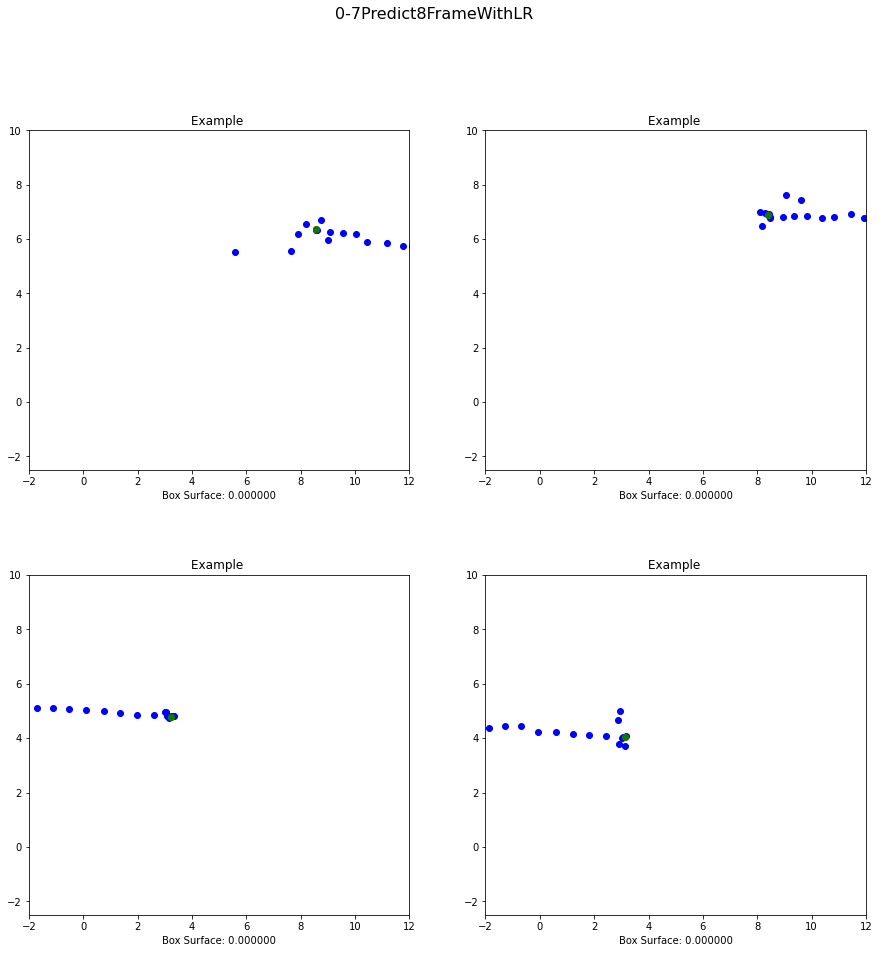

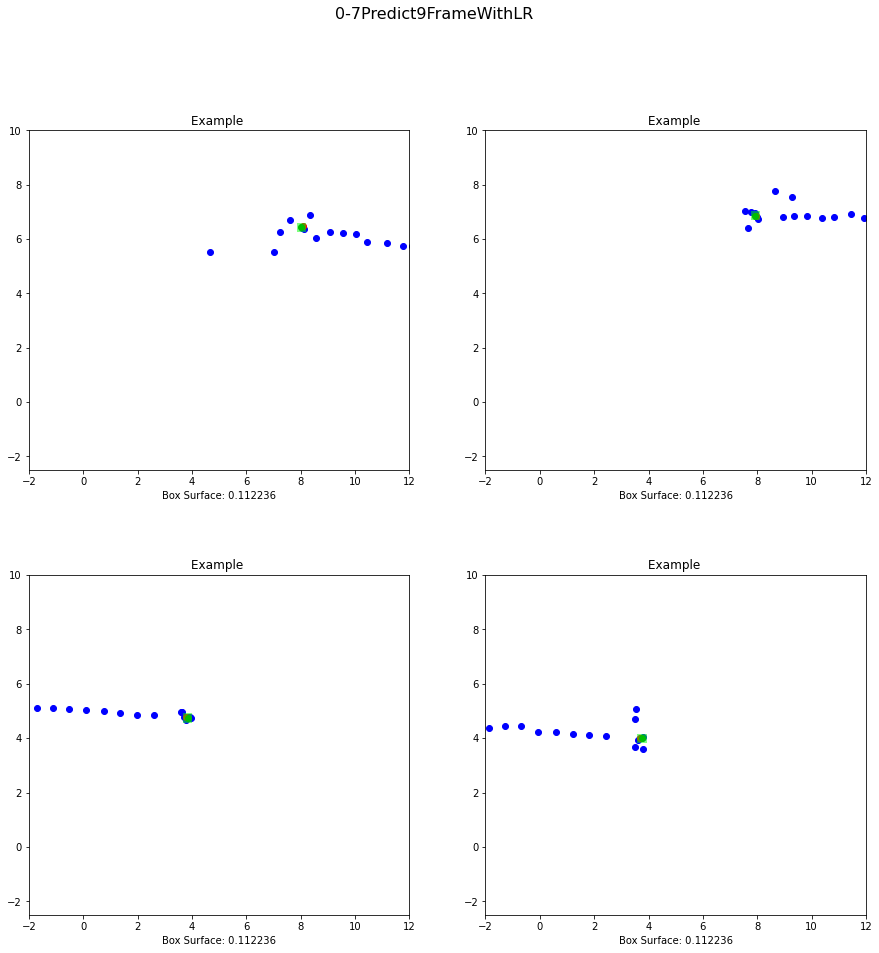

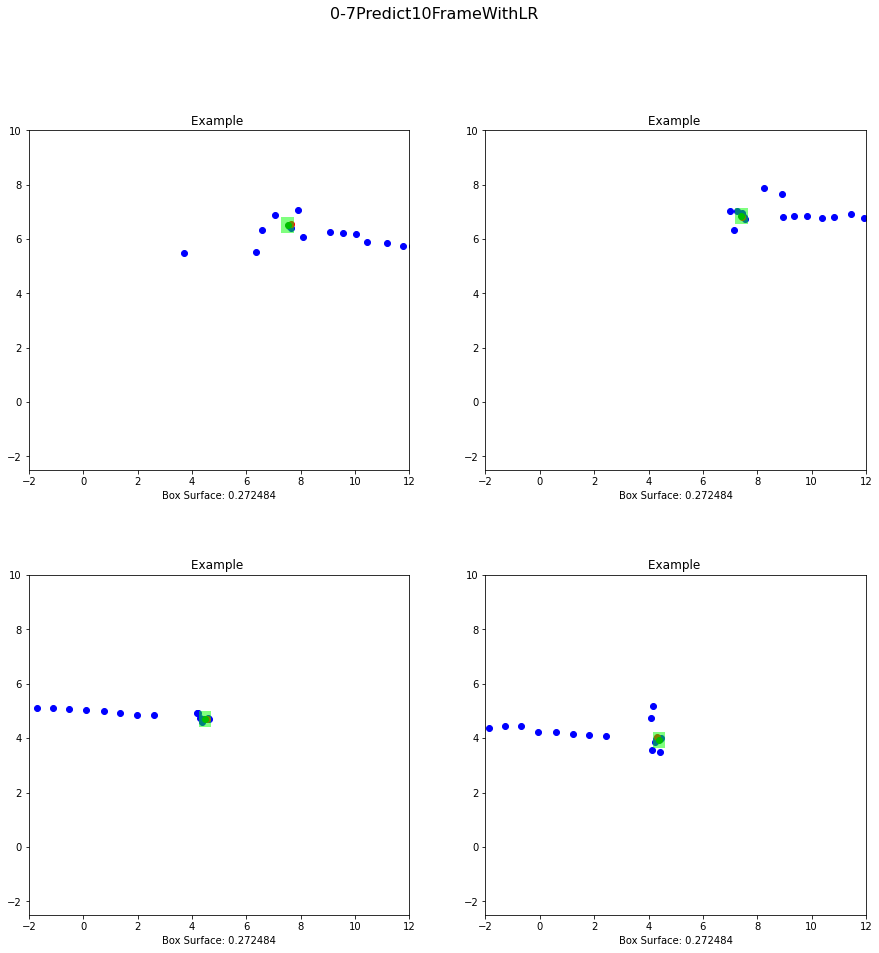

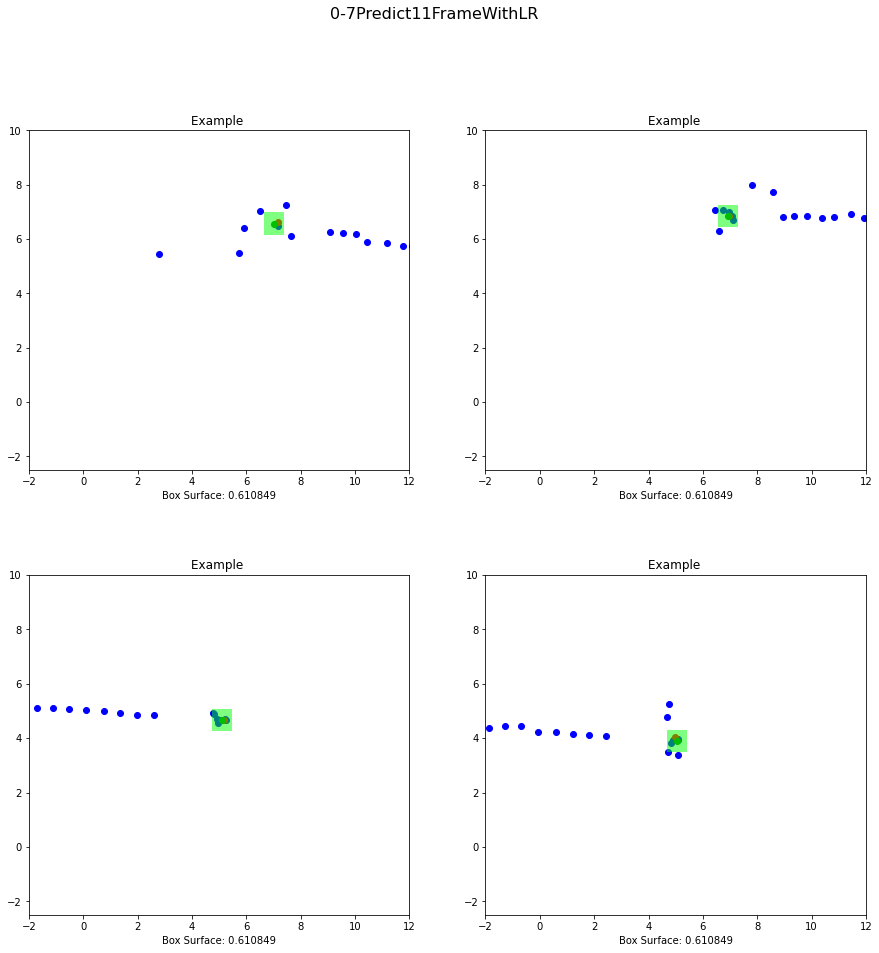

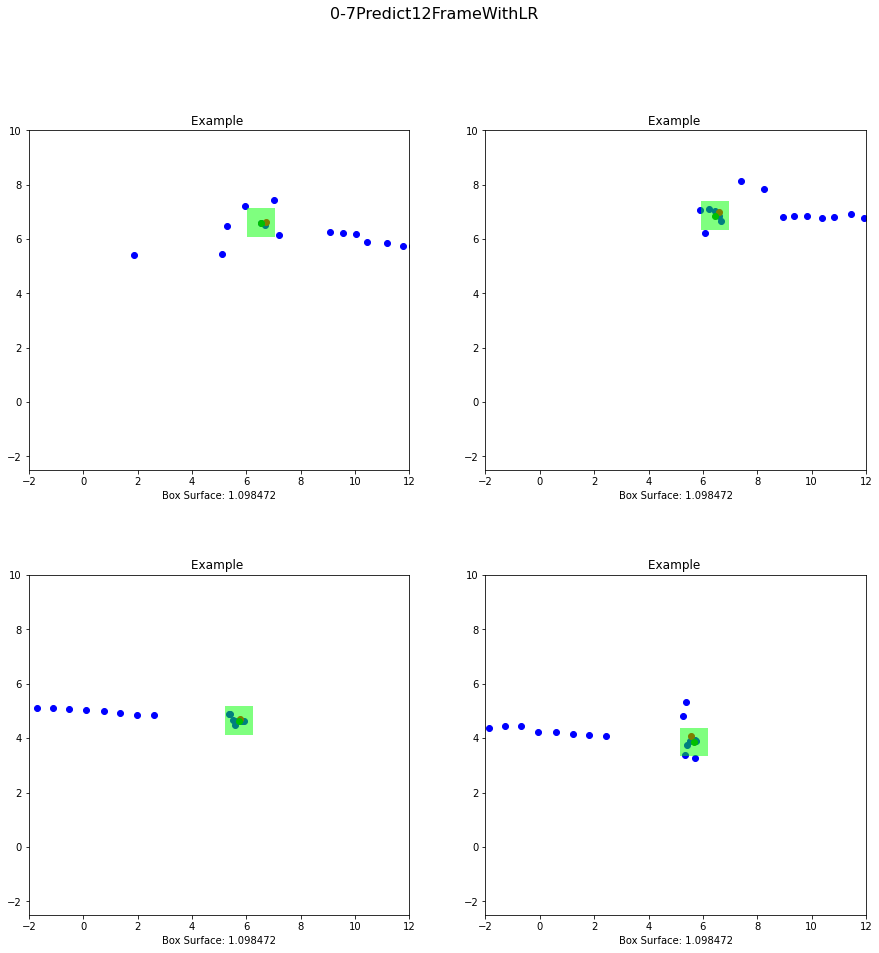

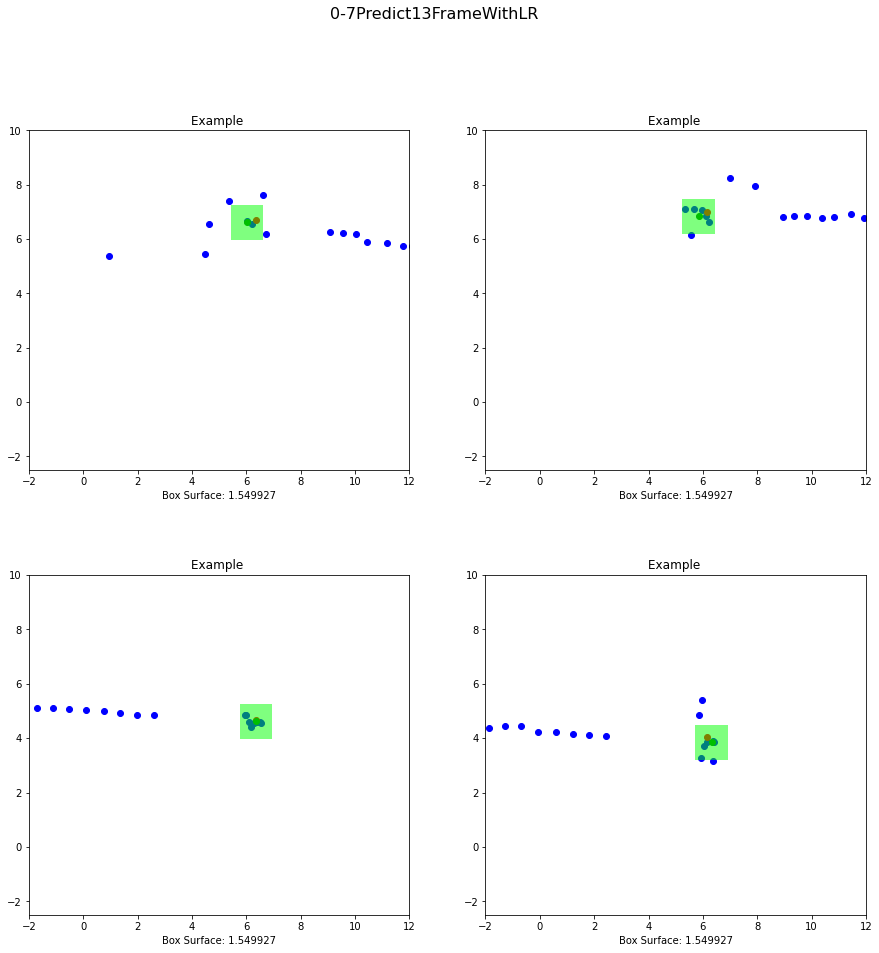

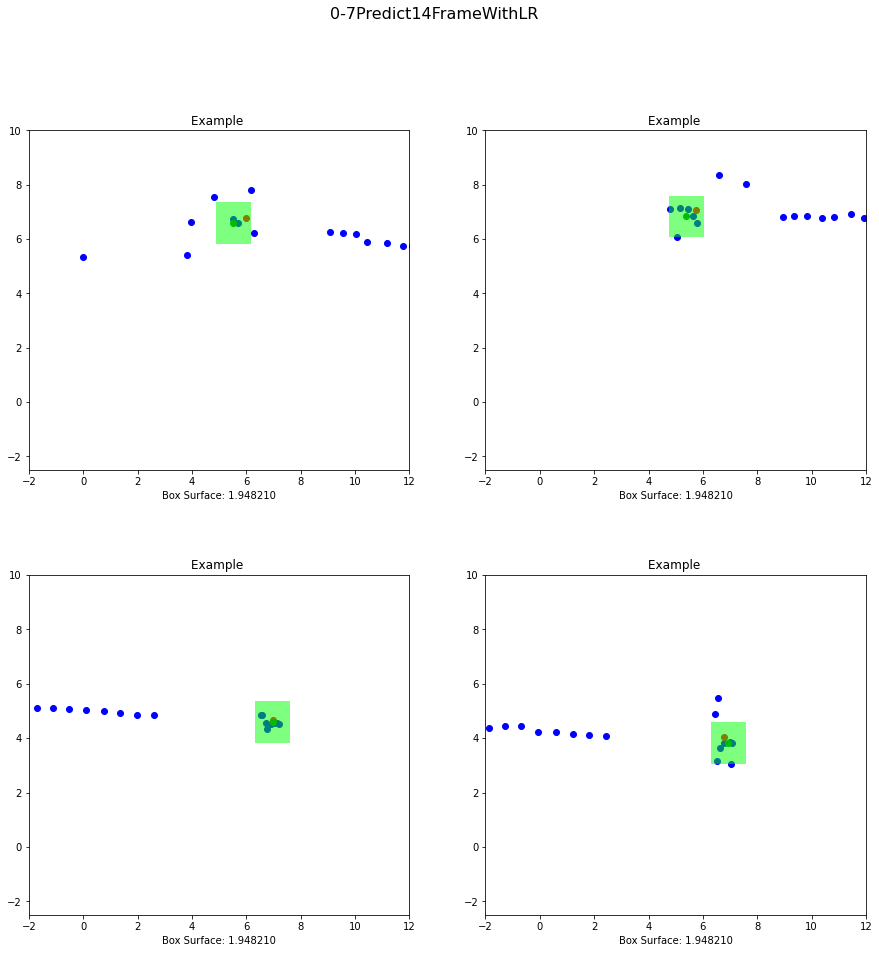

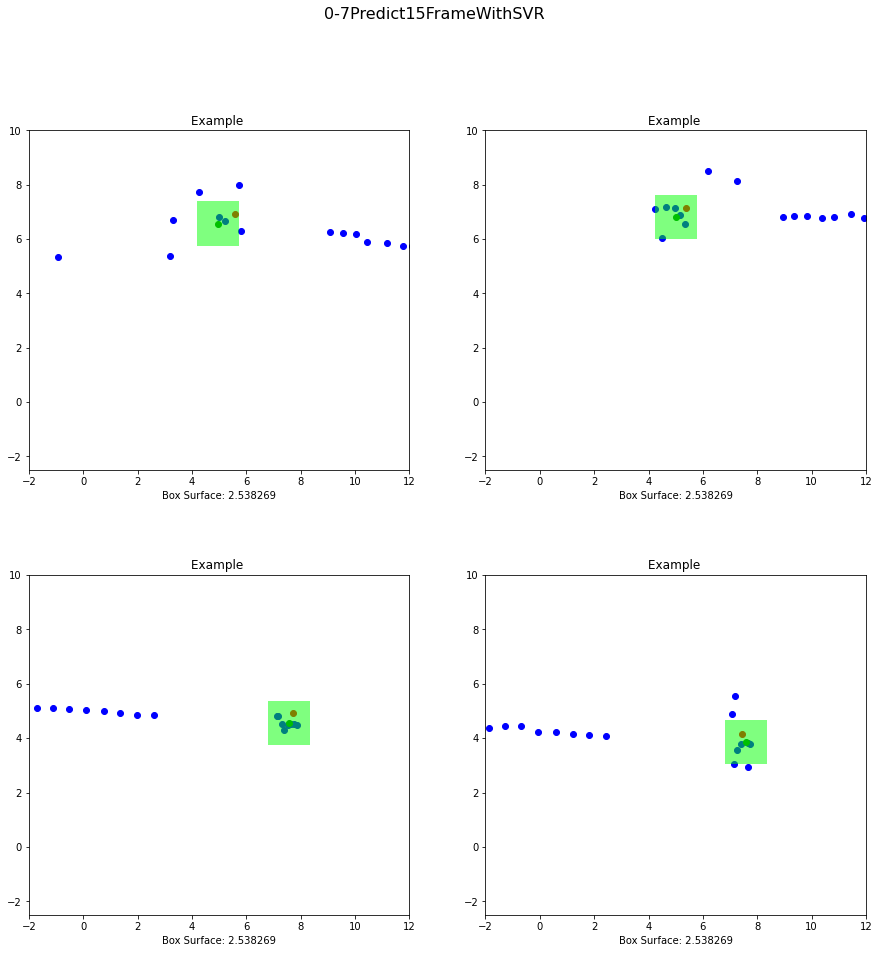

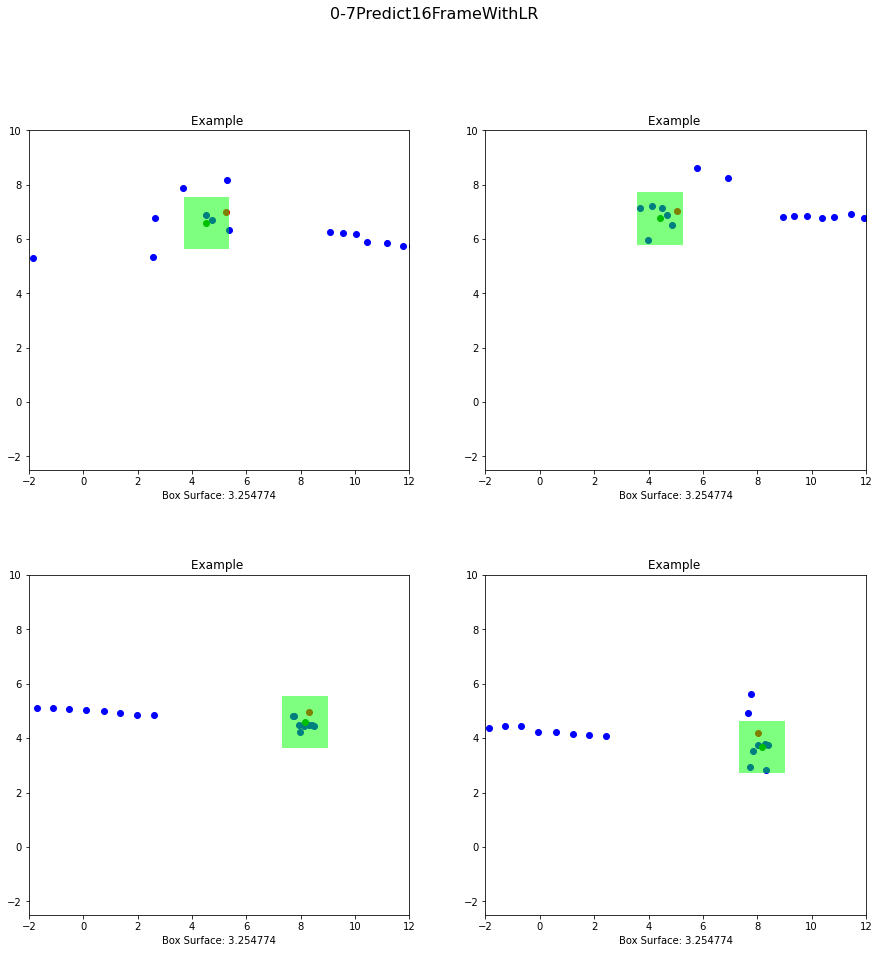

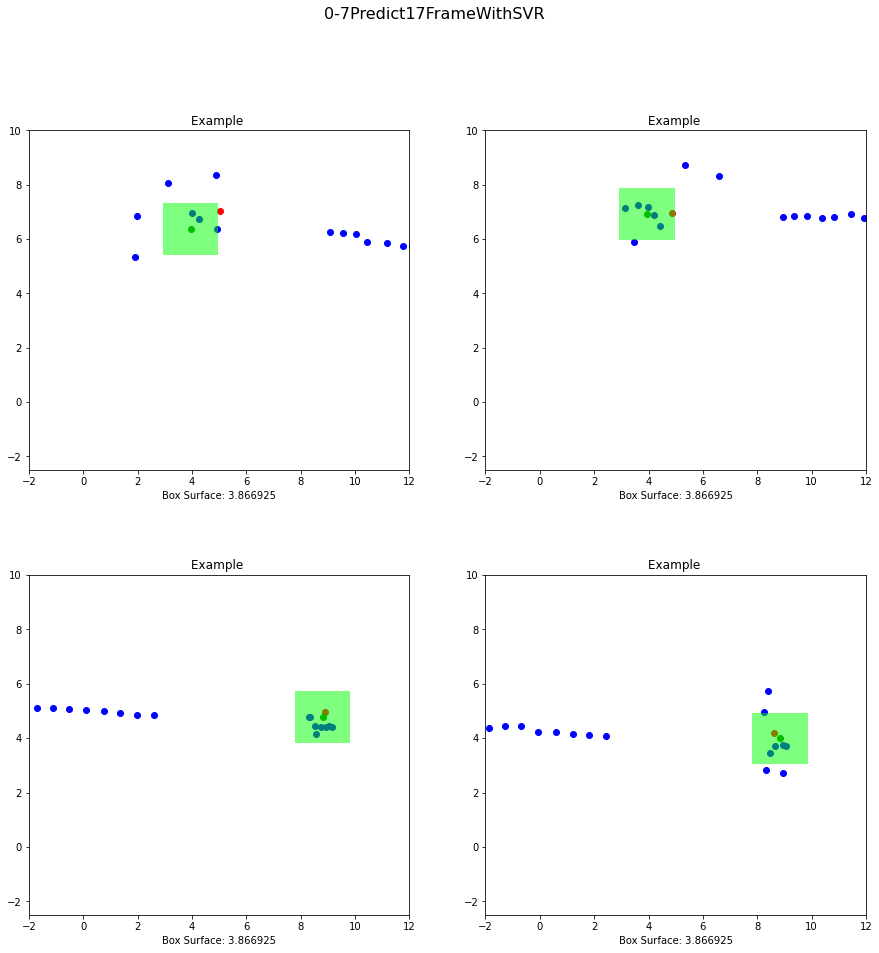

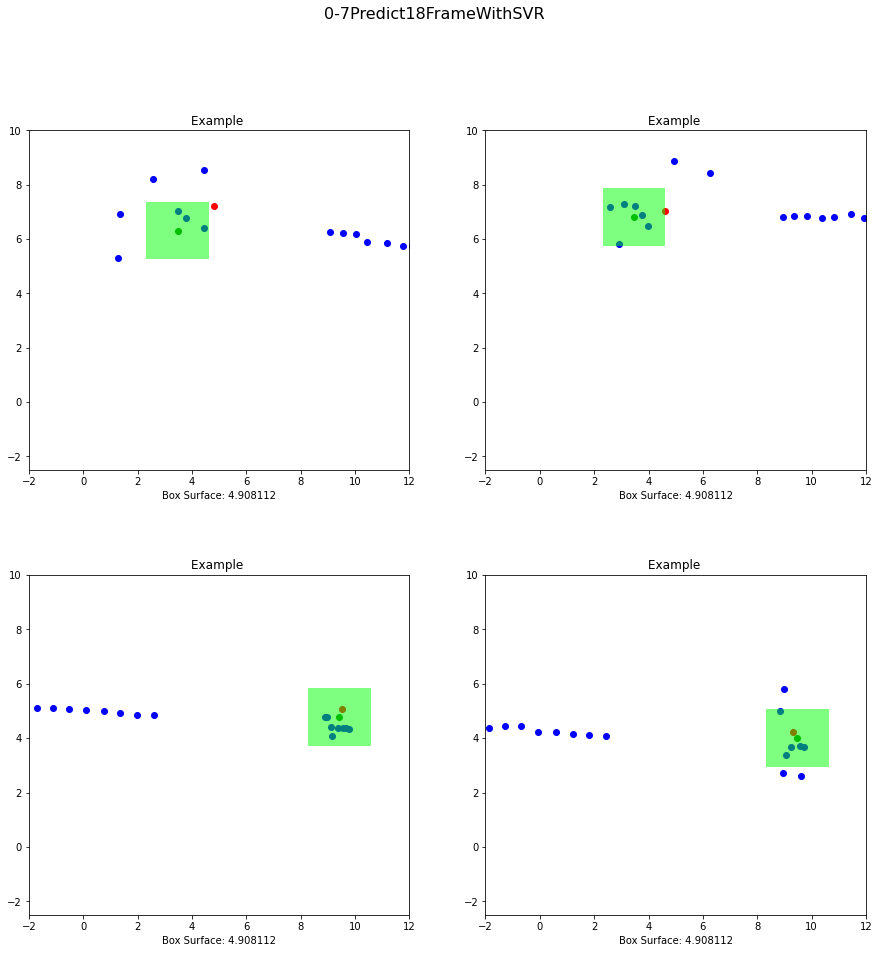

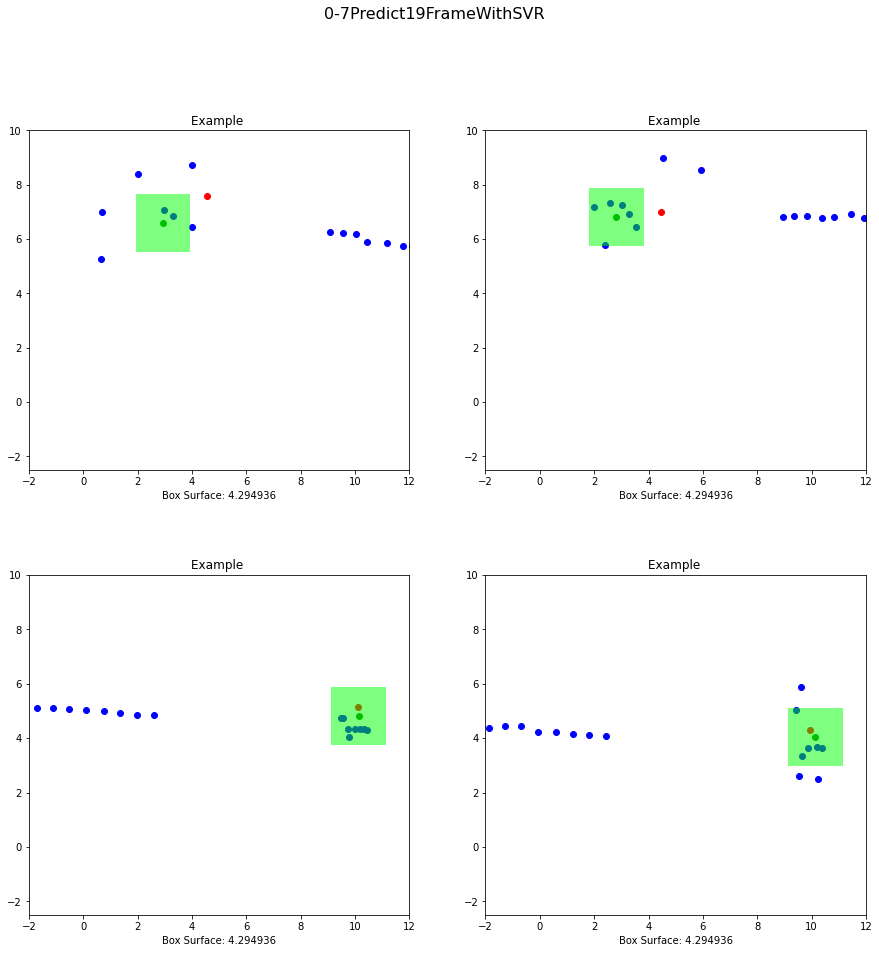

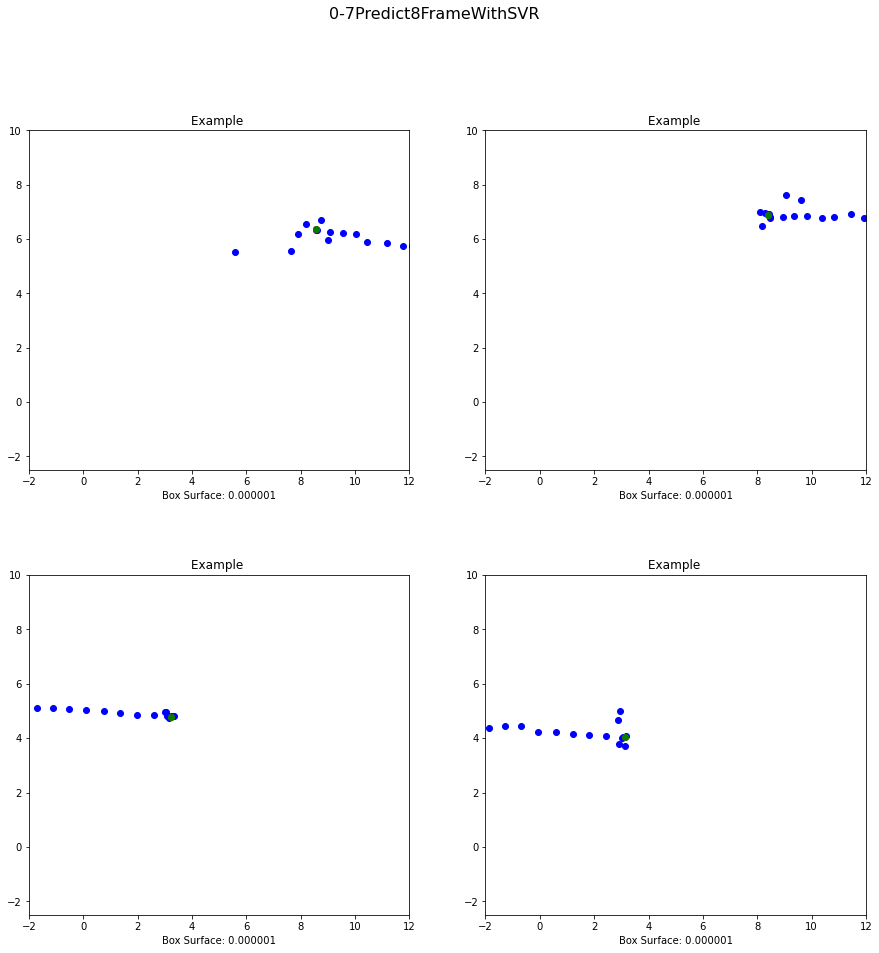

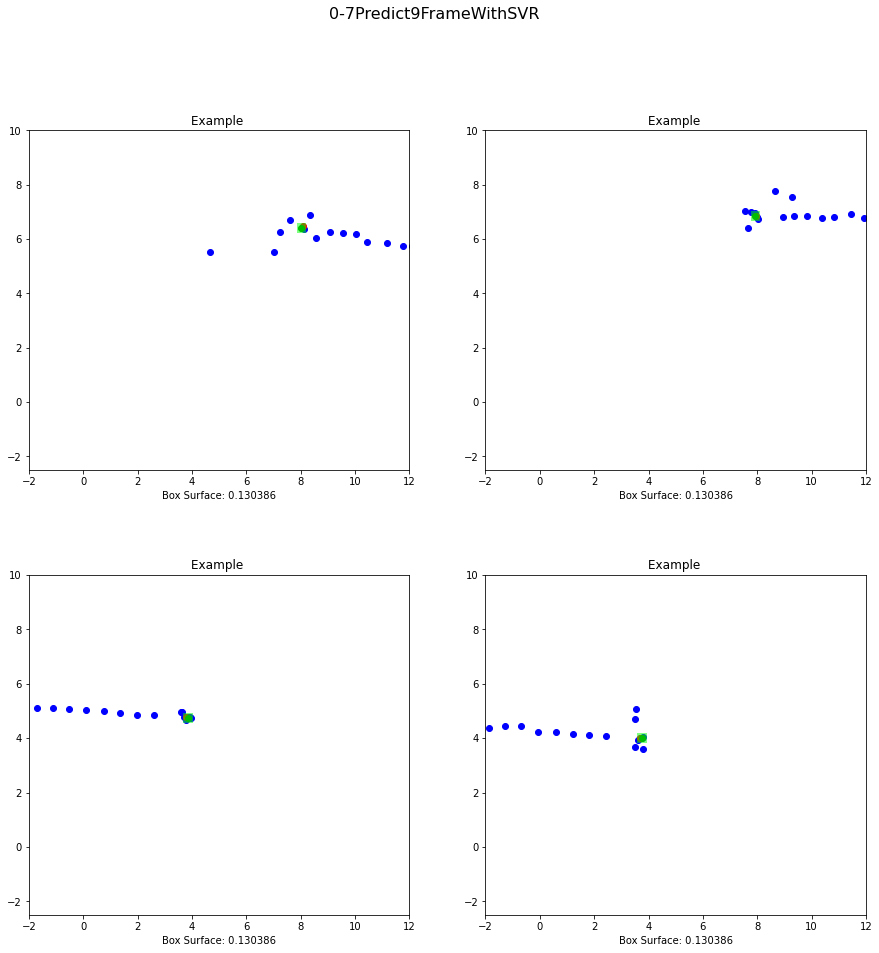

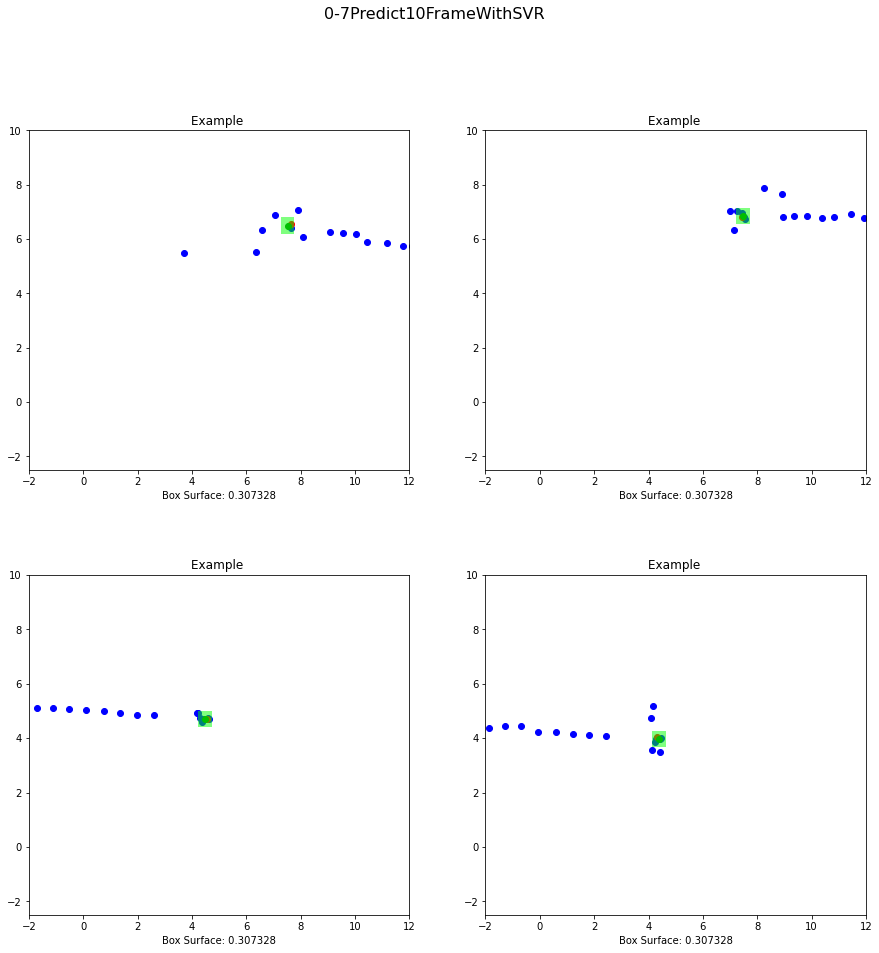

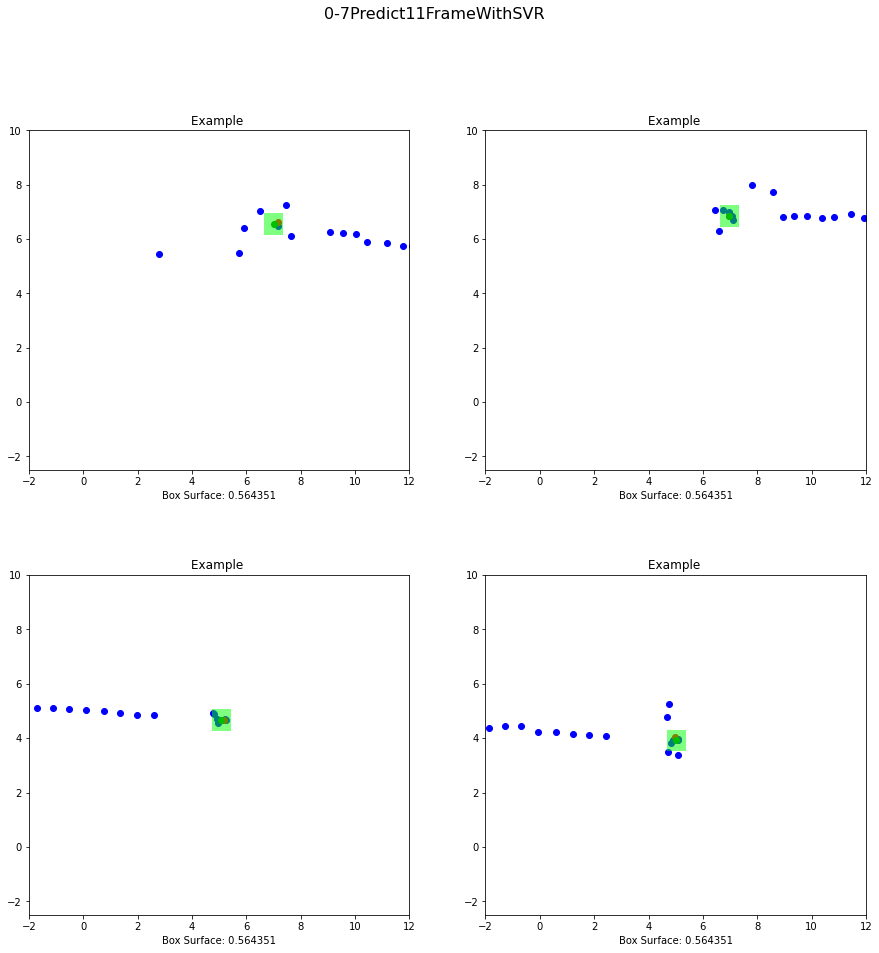

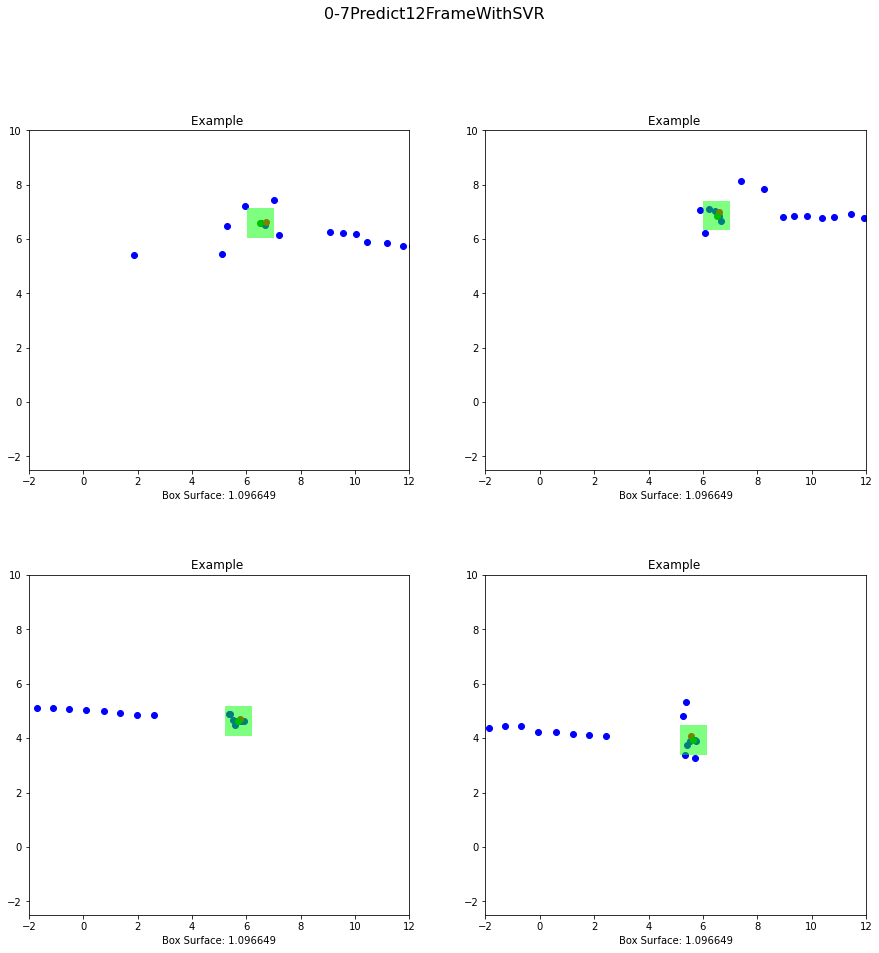

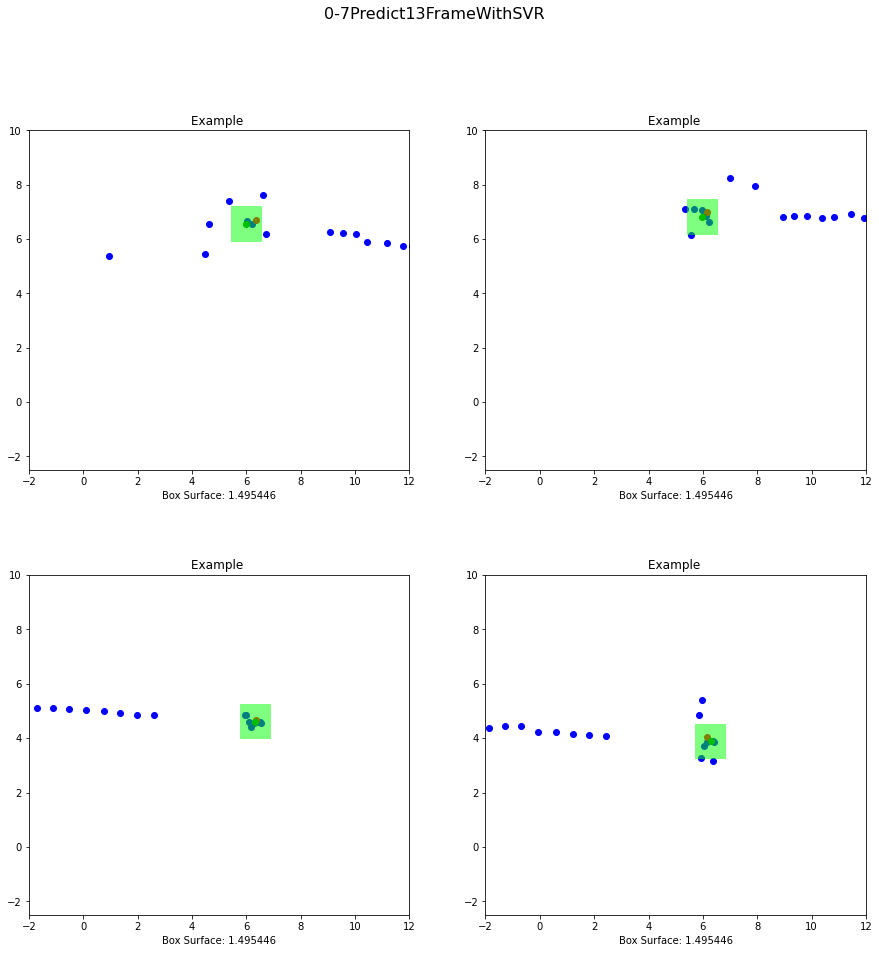

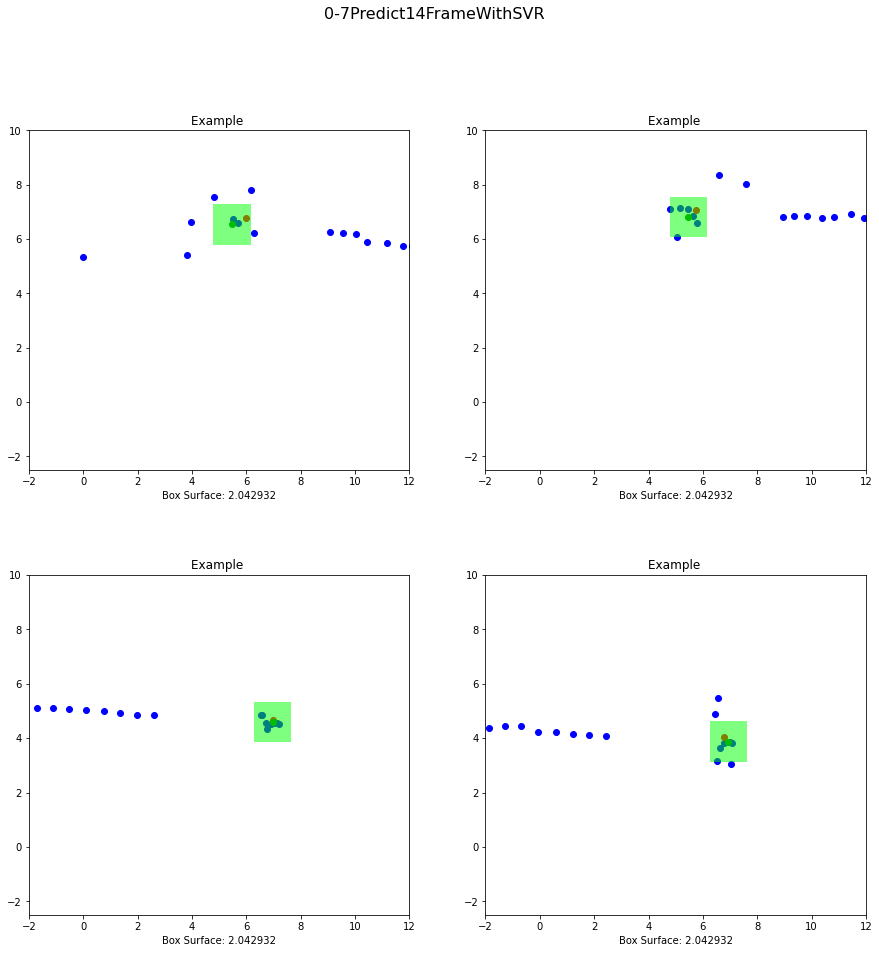

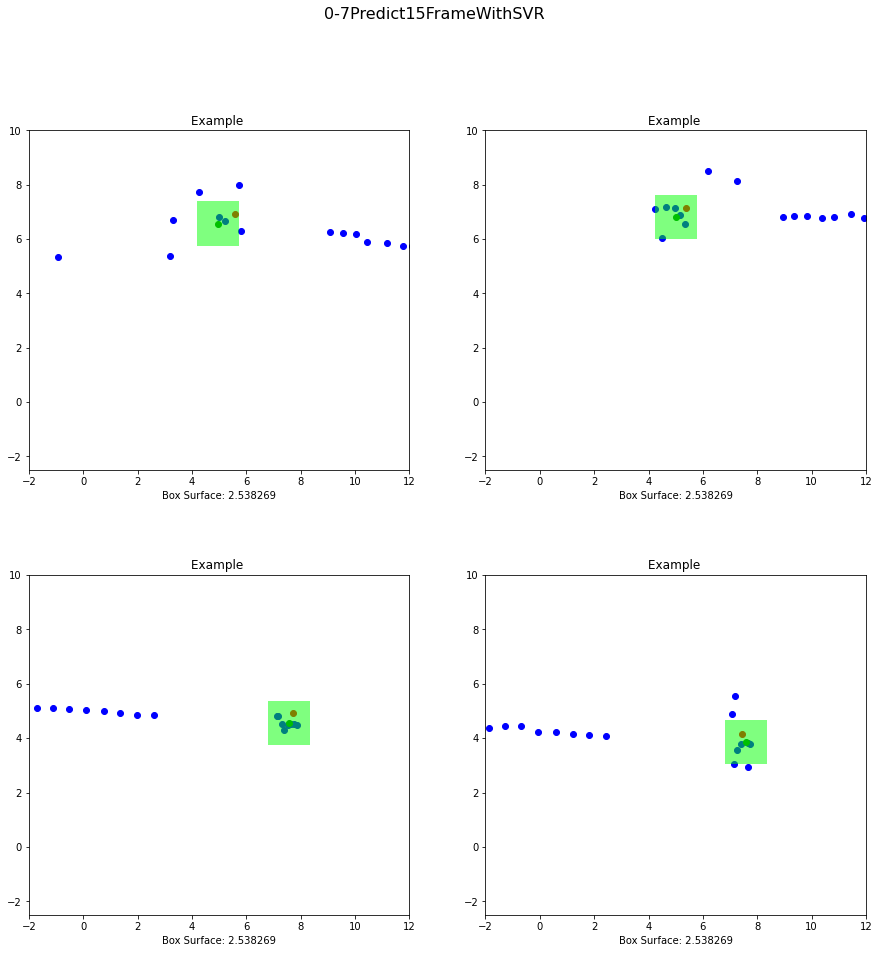

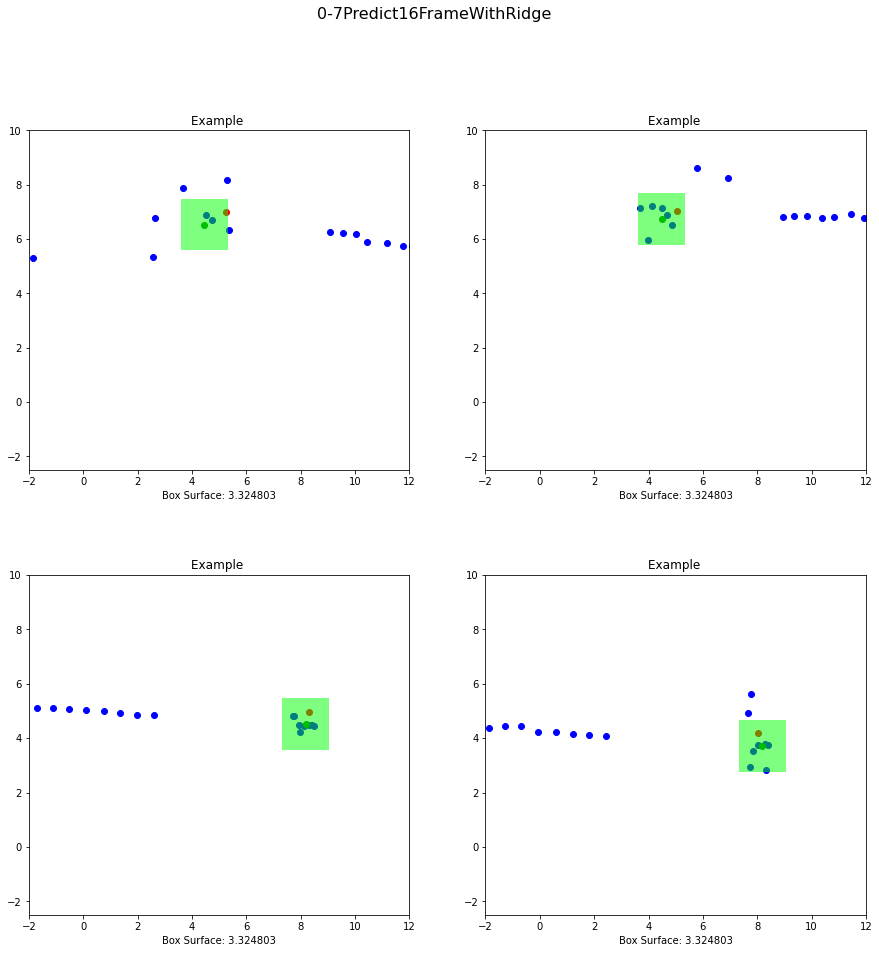

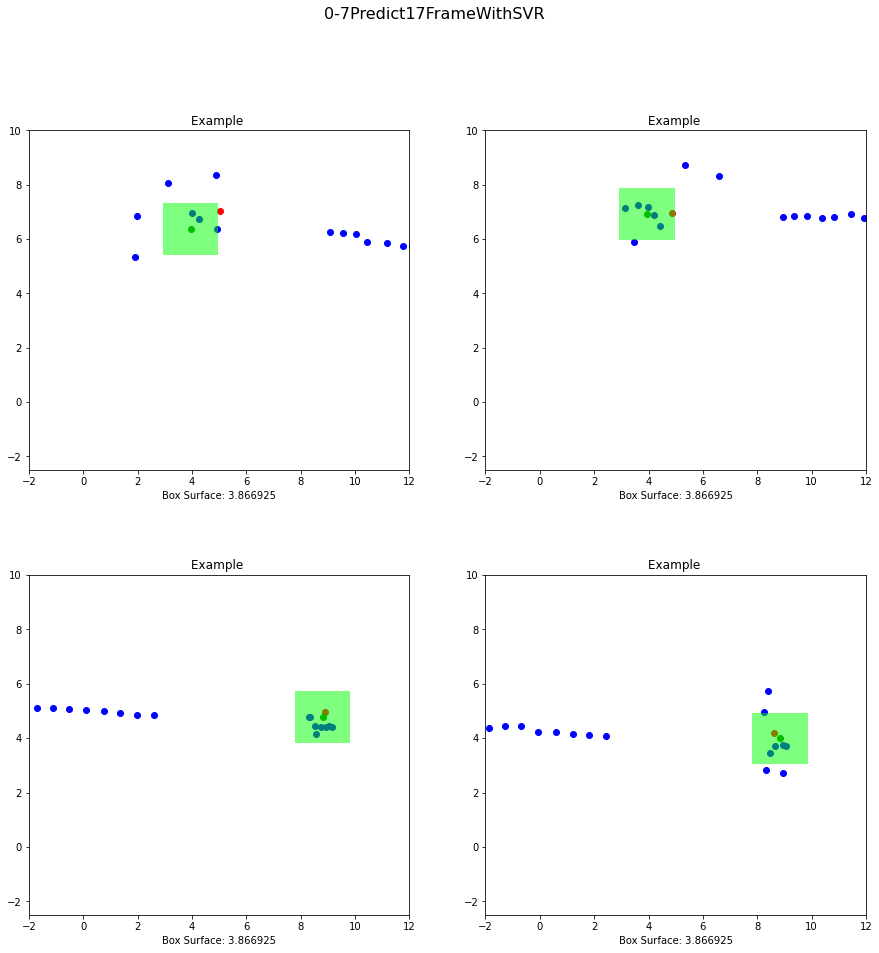

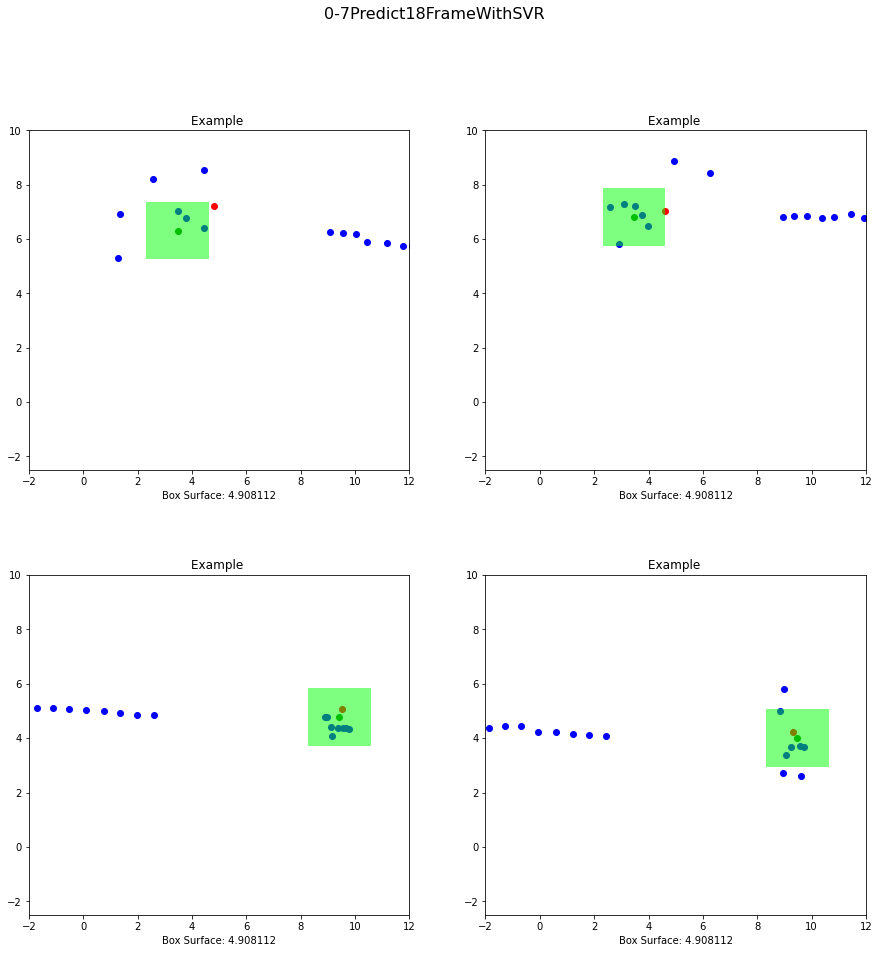

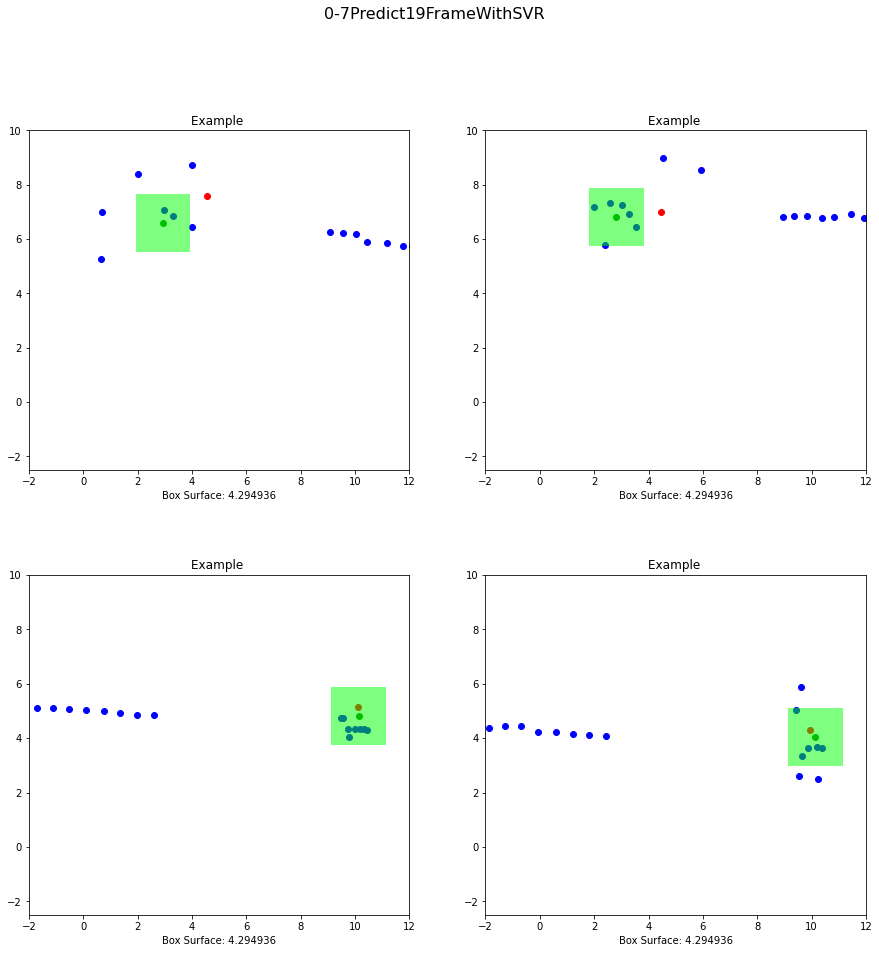

In [3]:
#best_model_x_coor_list,best_model_y_coor_list,result_df = get_best_model_list(trajs,train_range_pos,end_pred_pos,print_model=False,get_lr=False,print_traj=True,save_path="model_list/")
best_model_x_coor_list_lr,best_model_y_coor_list_lr,result_df_lr = get_best_model_list(trajs,train_range_pos,end_pred_pos,print_model=False,mode="LR",save_path="LR/",print_traj=True)
best_model_x_coor_list_r,best_model_y_coor_list_r,result_df_r = get_best_model_list(trajs,train_range_pos,end_pred_pos,print_model=False,mode="Ridge",save_path="Ridge/",print_traj=True)




C:\Users\stefa\OneDrive\Git\malis-final-2021\Library.py:330: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(row, col)


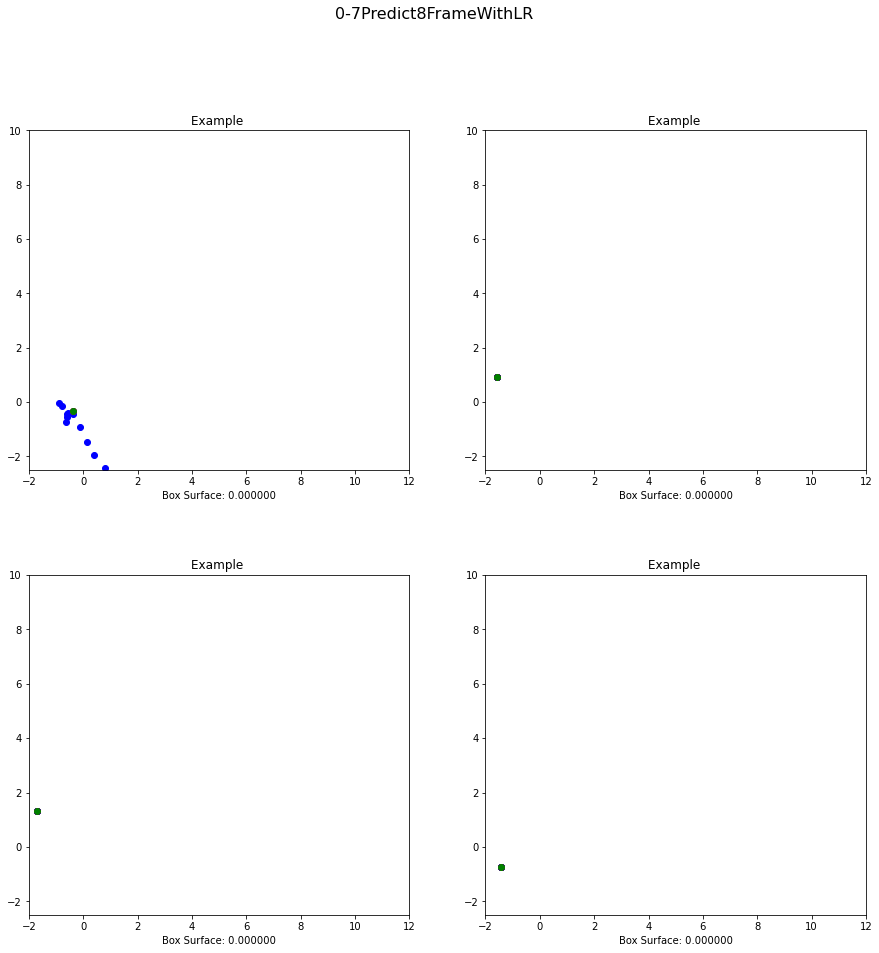

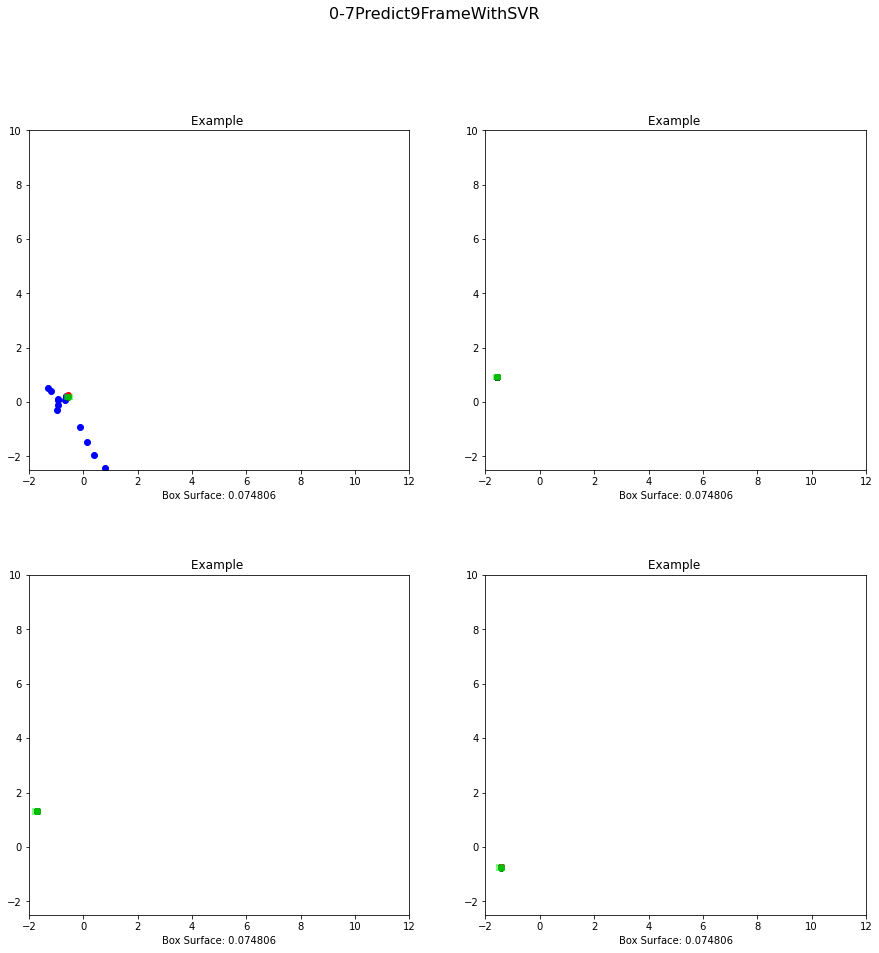

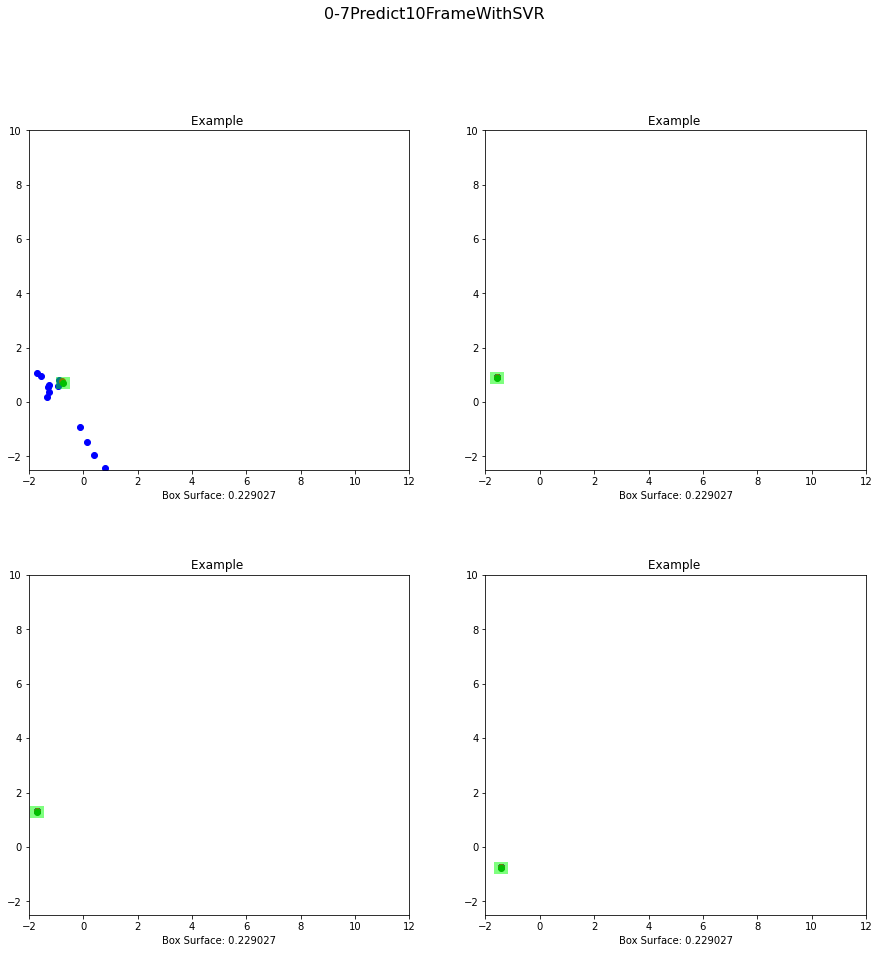

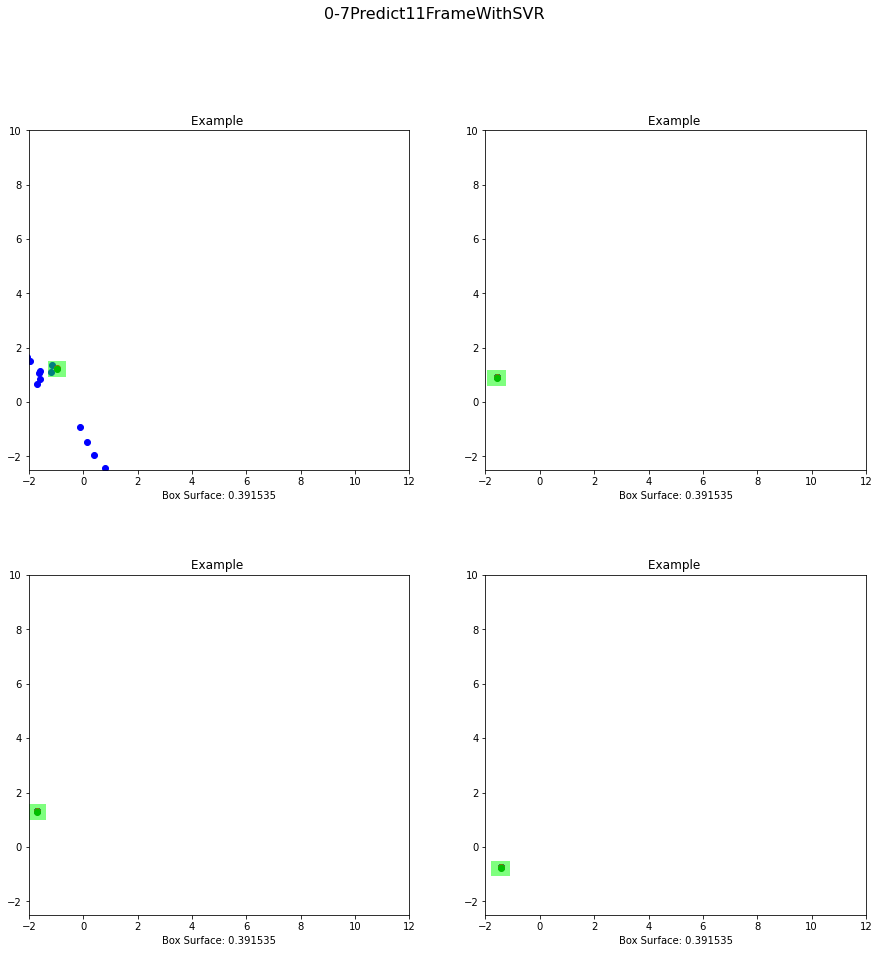

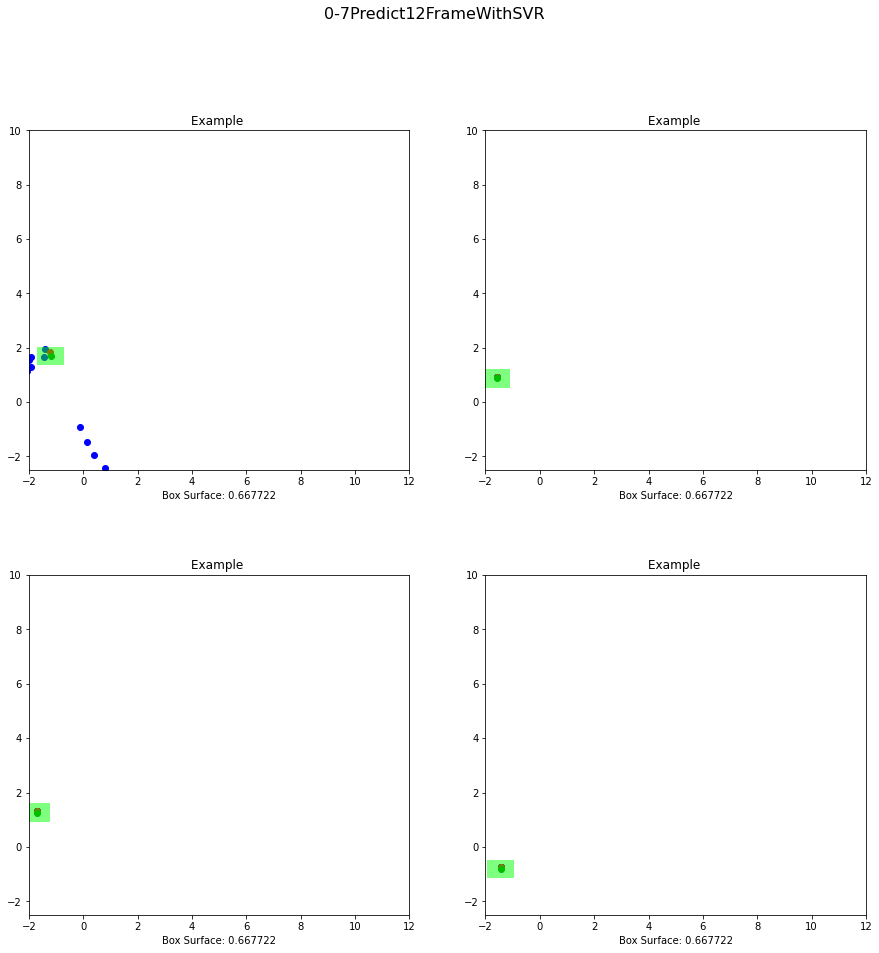

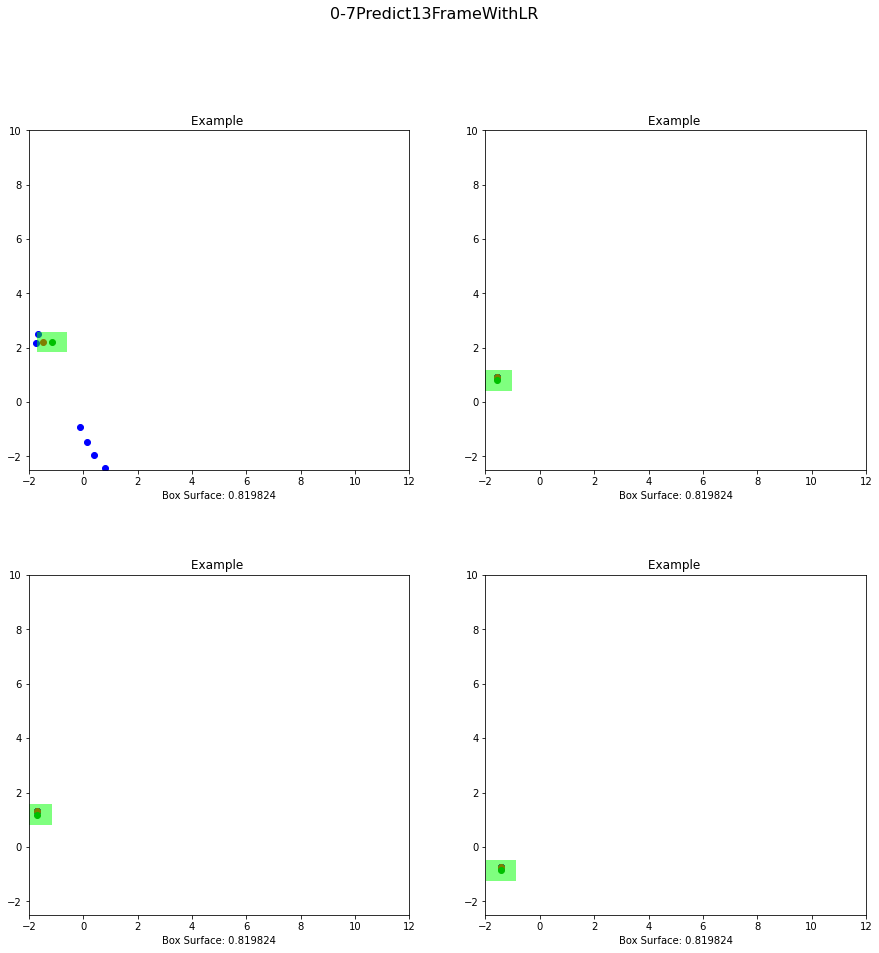

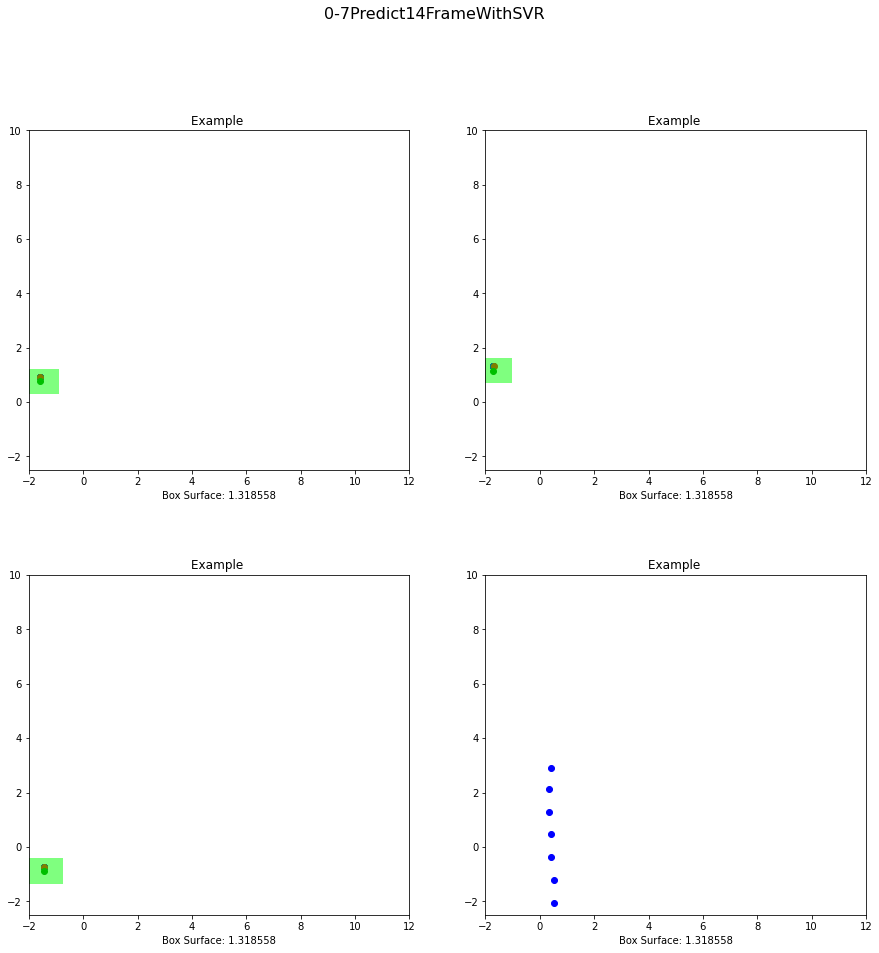

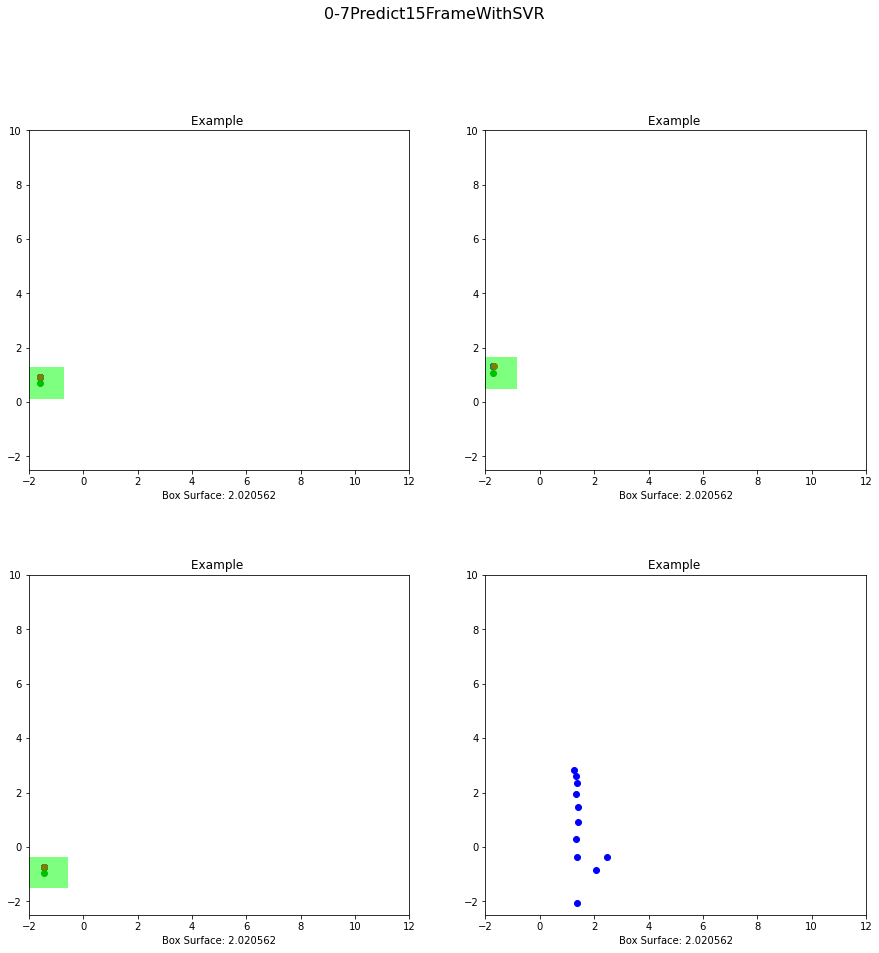

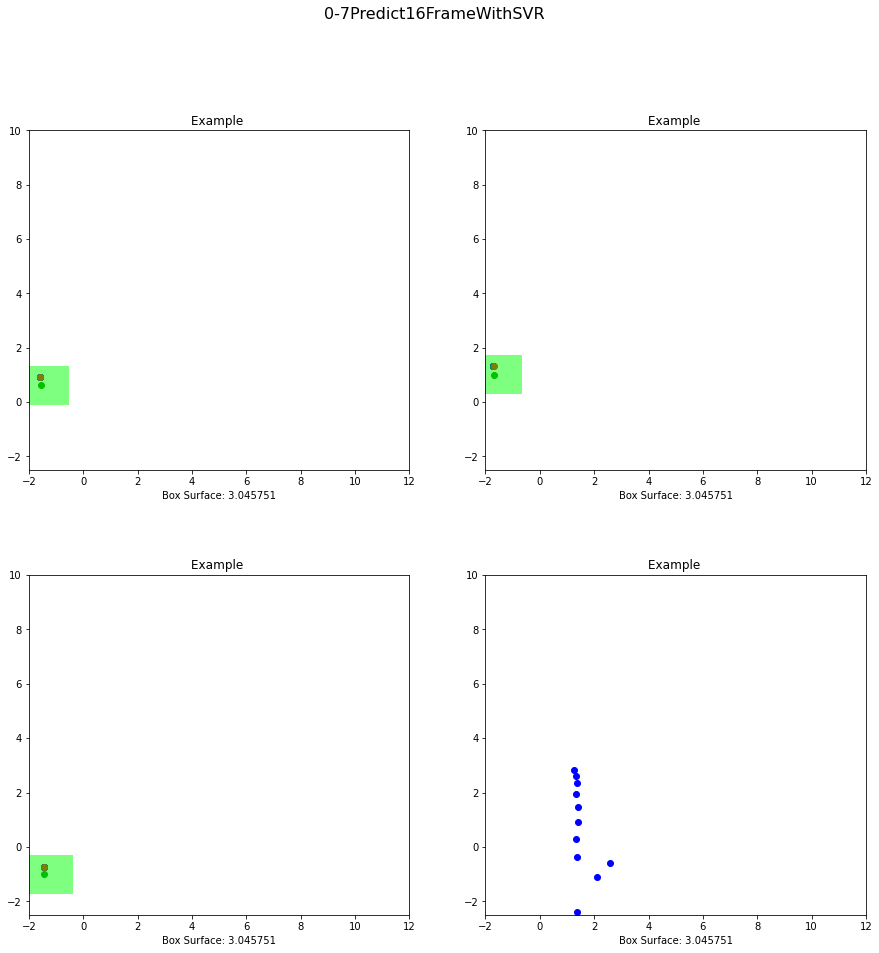

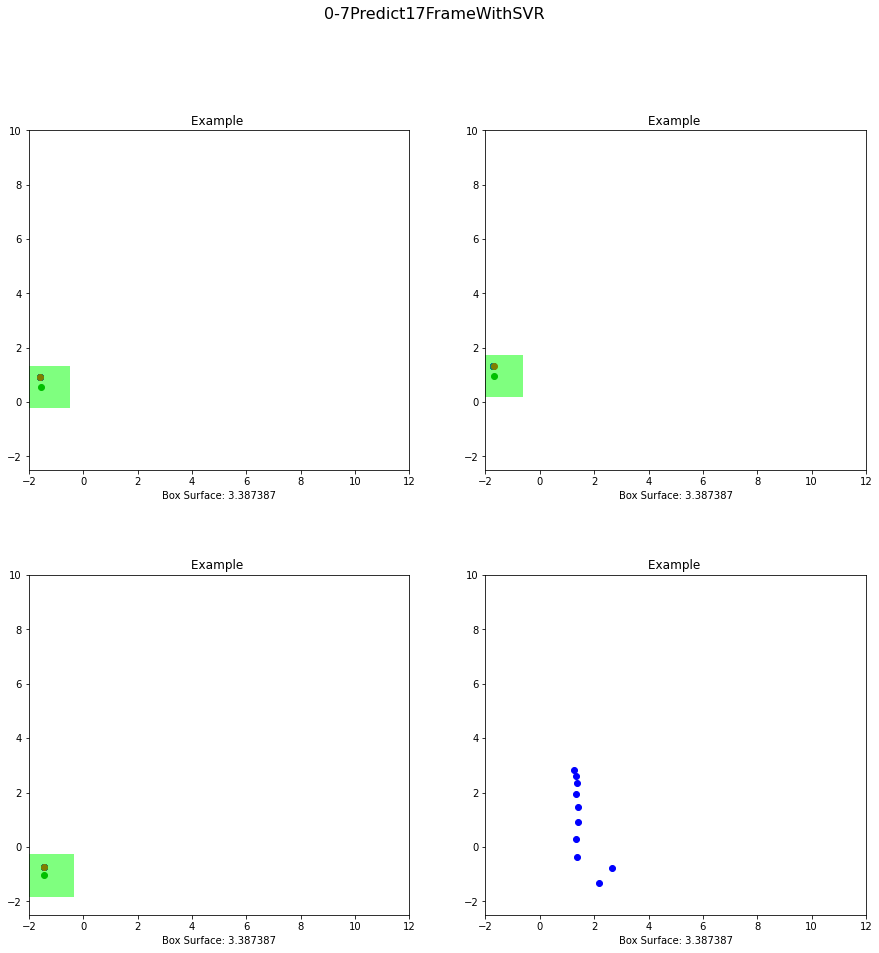

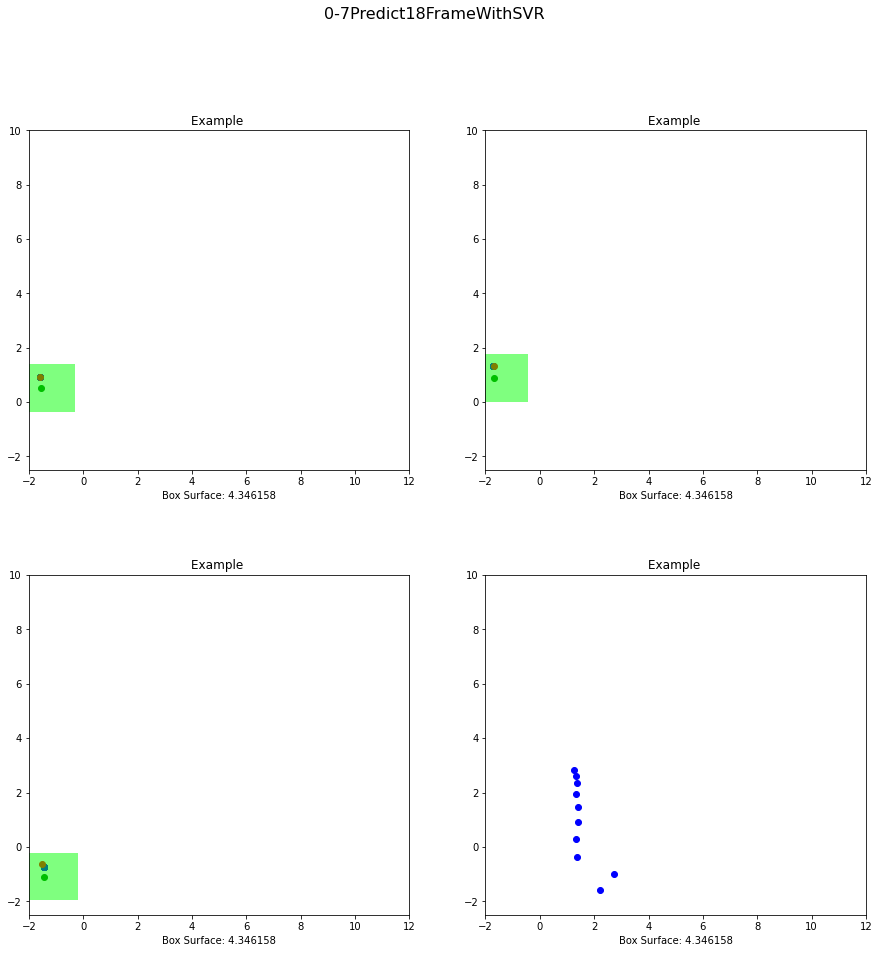

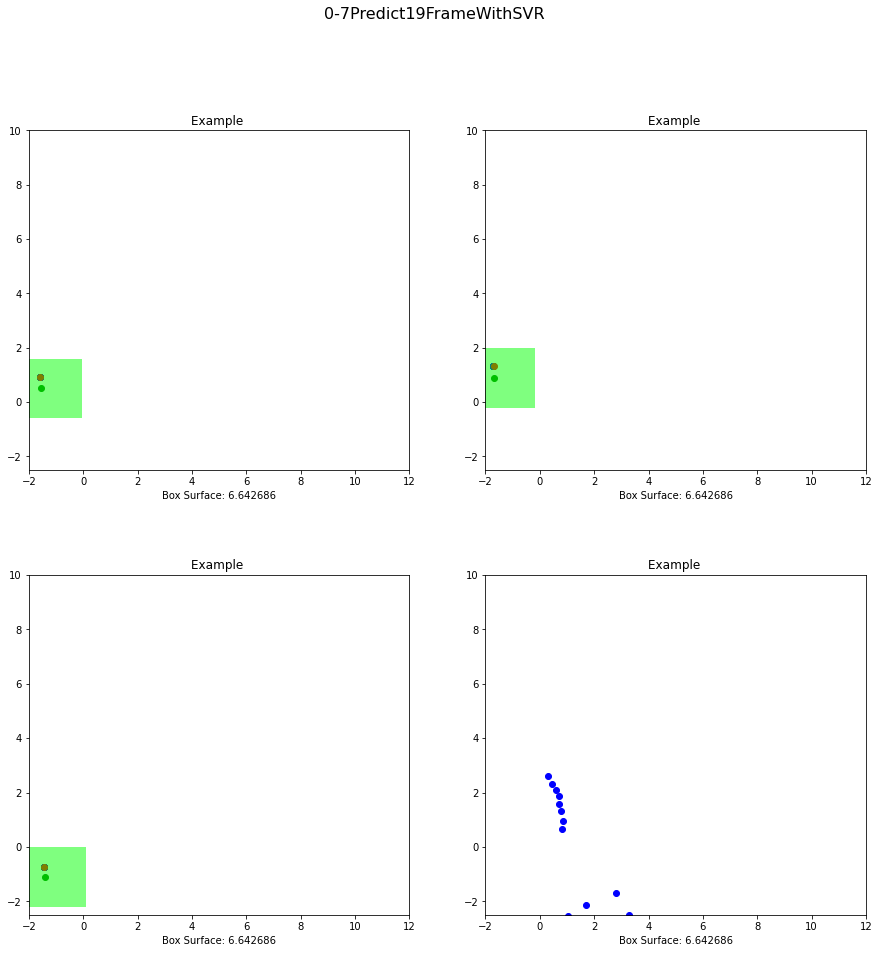

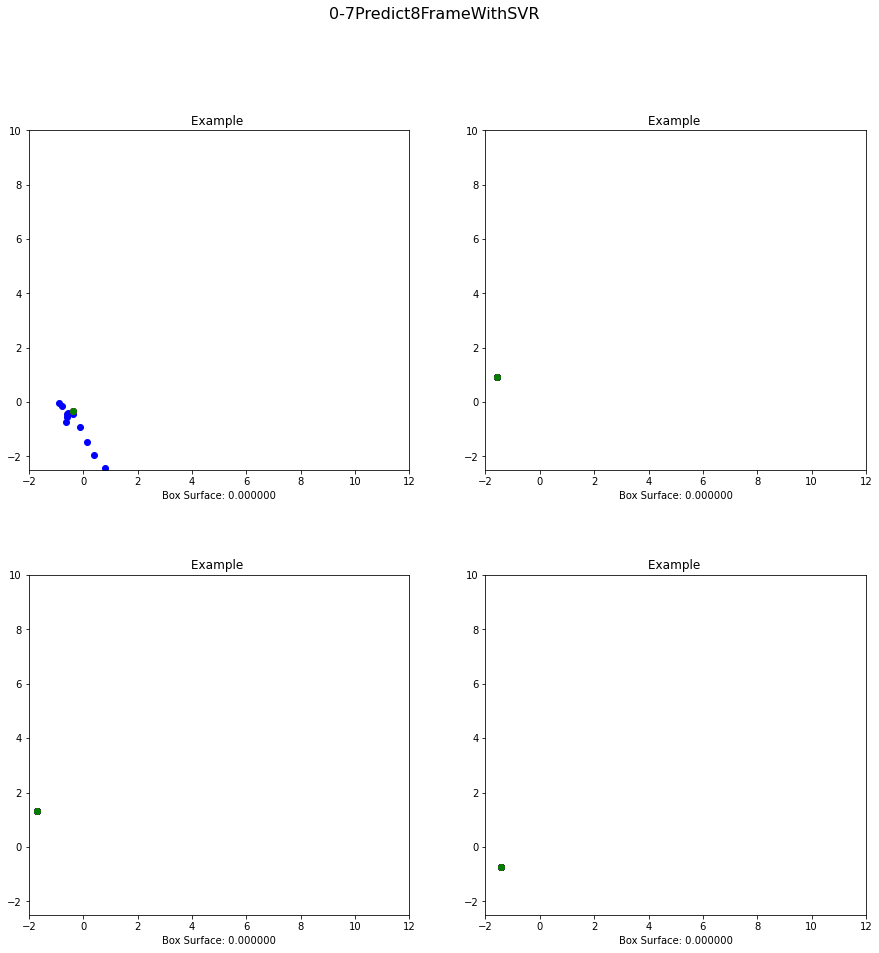

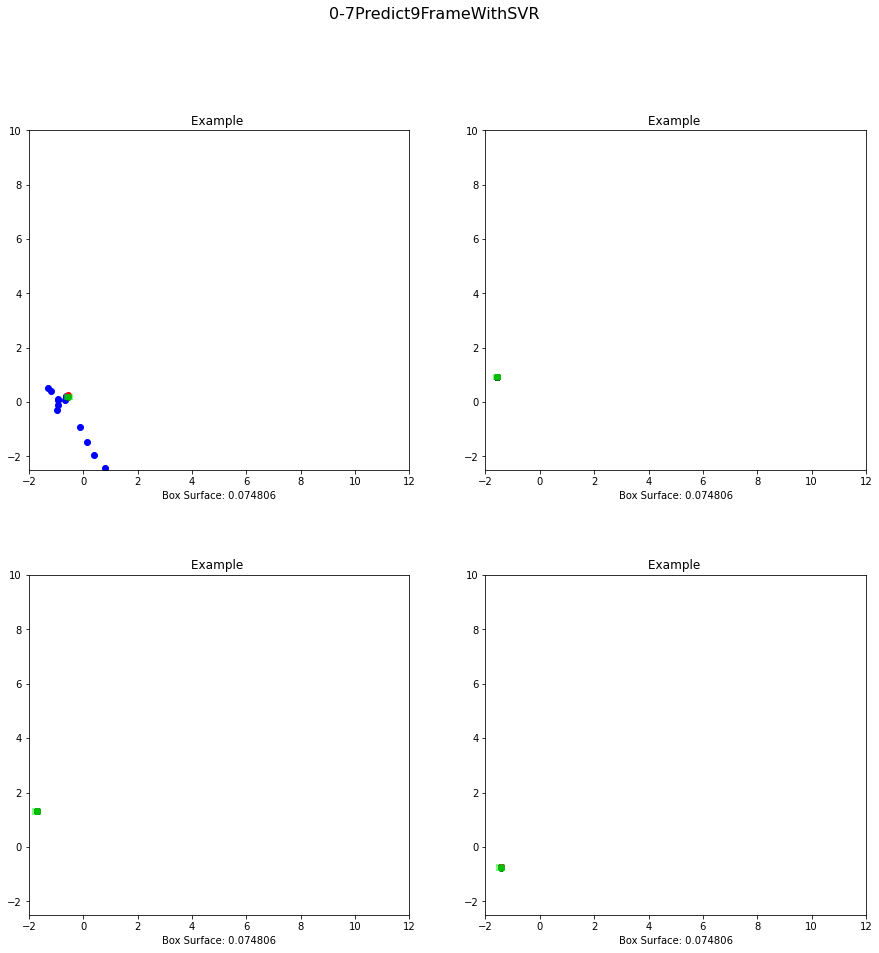

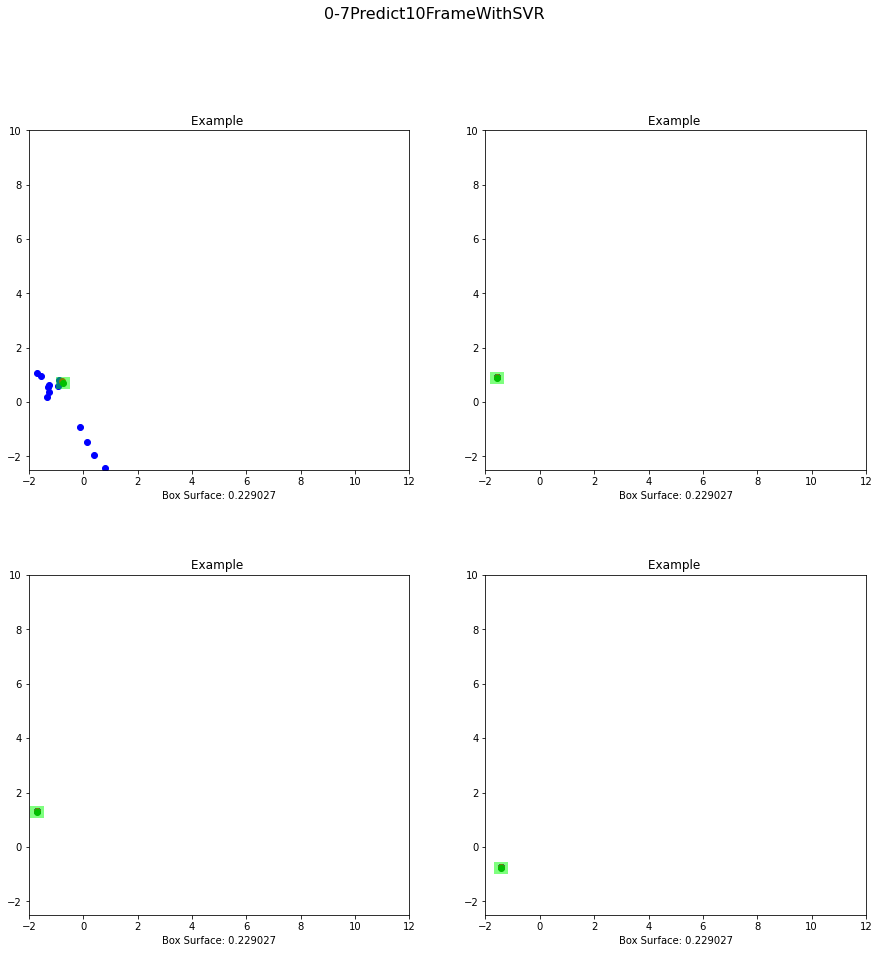

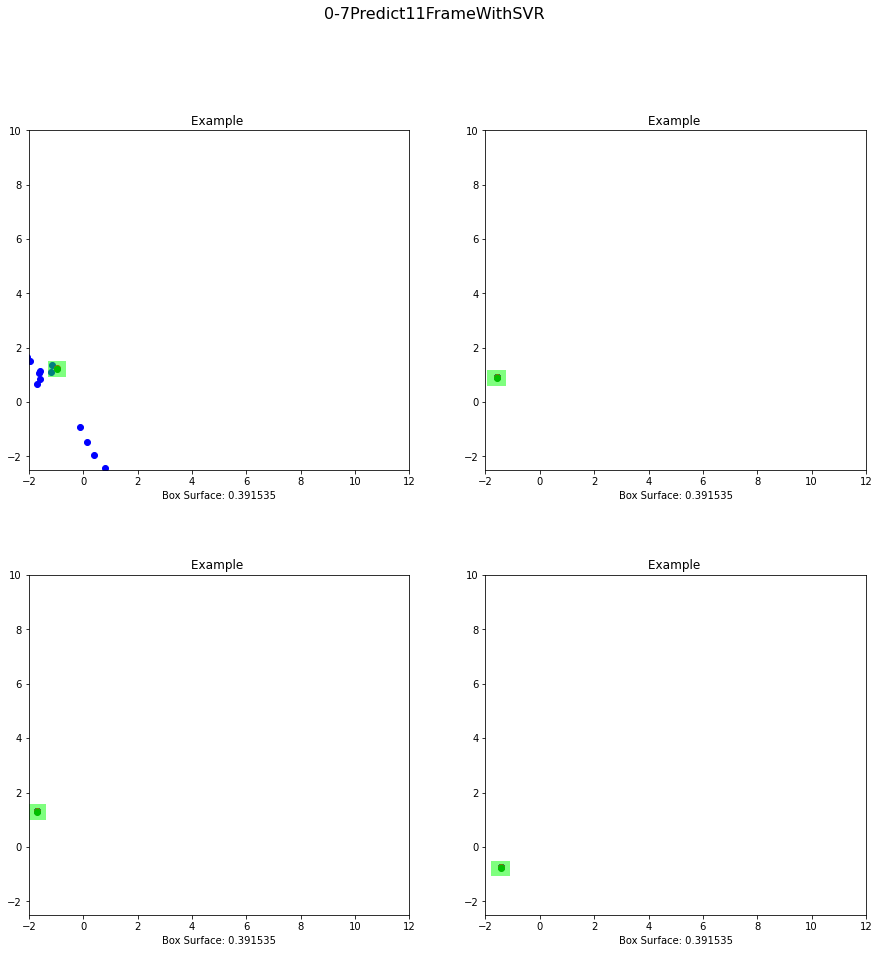

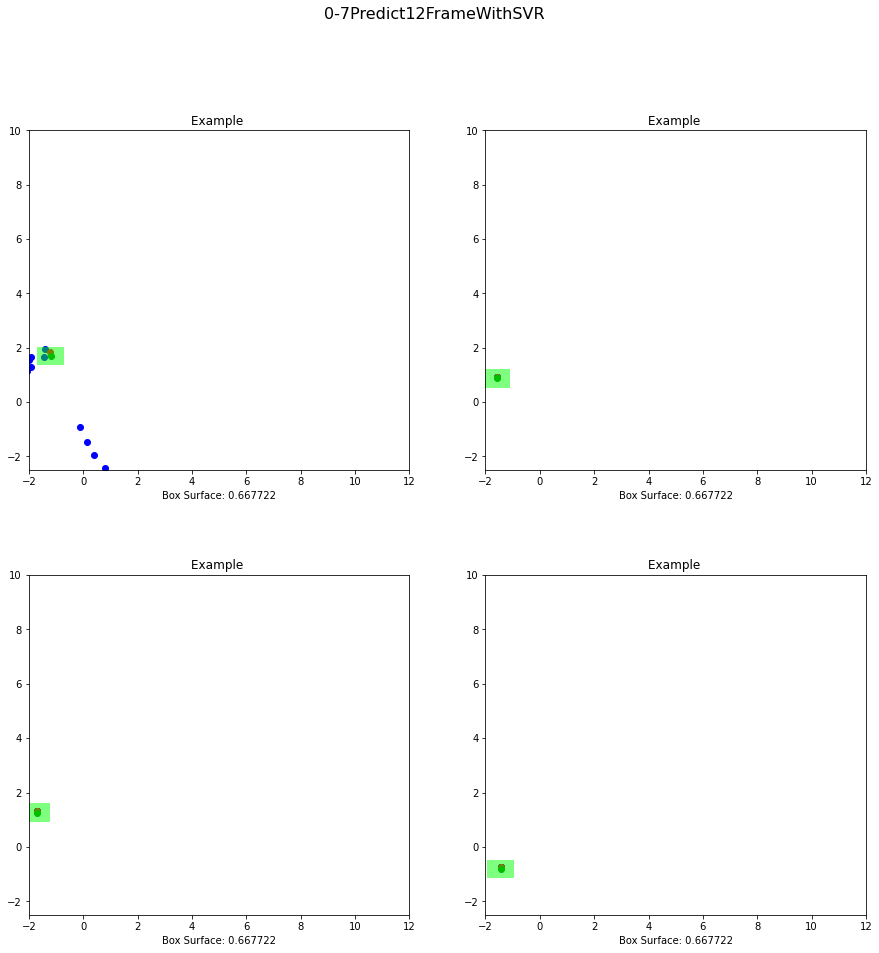

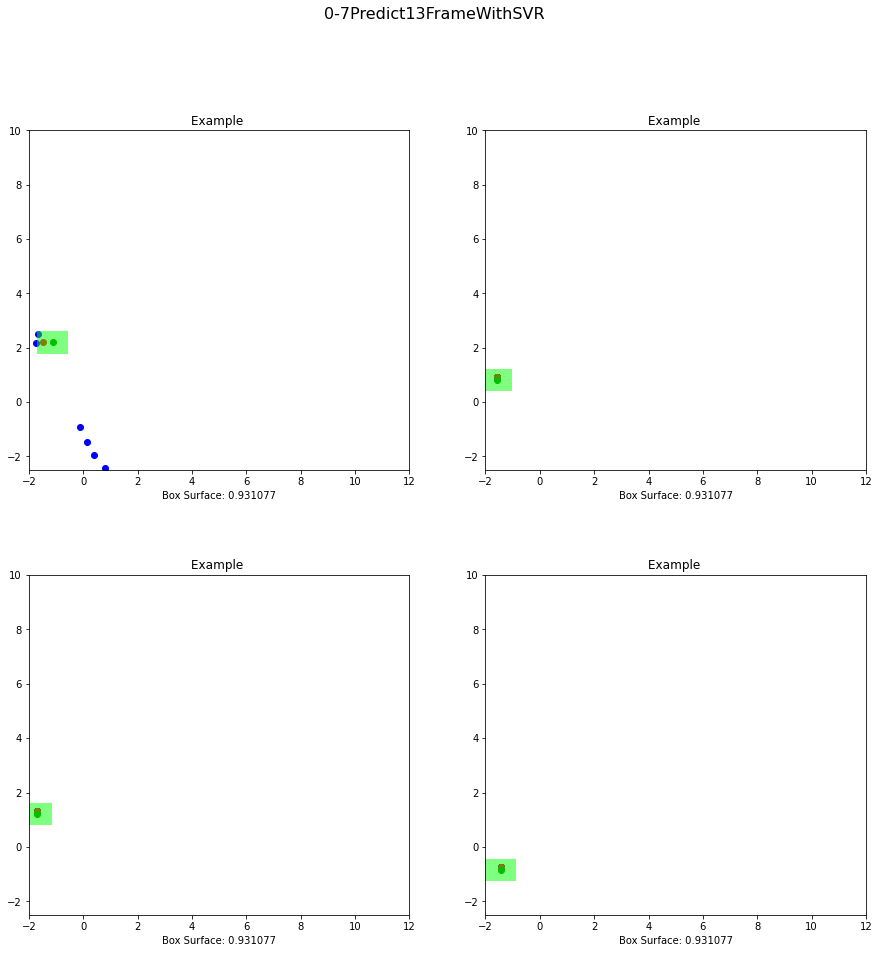

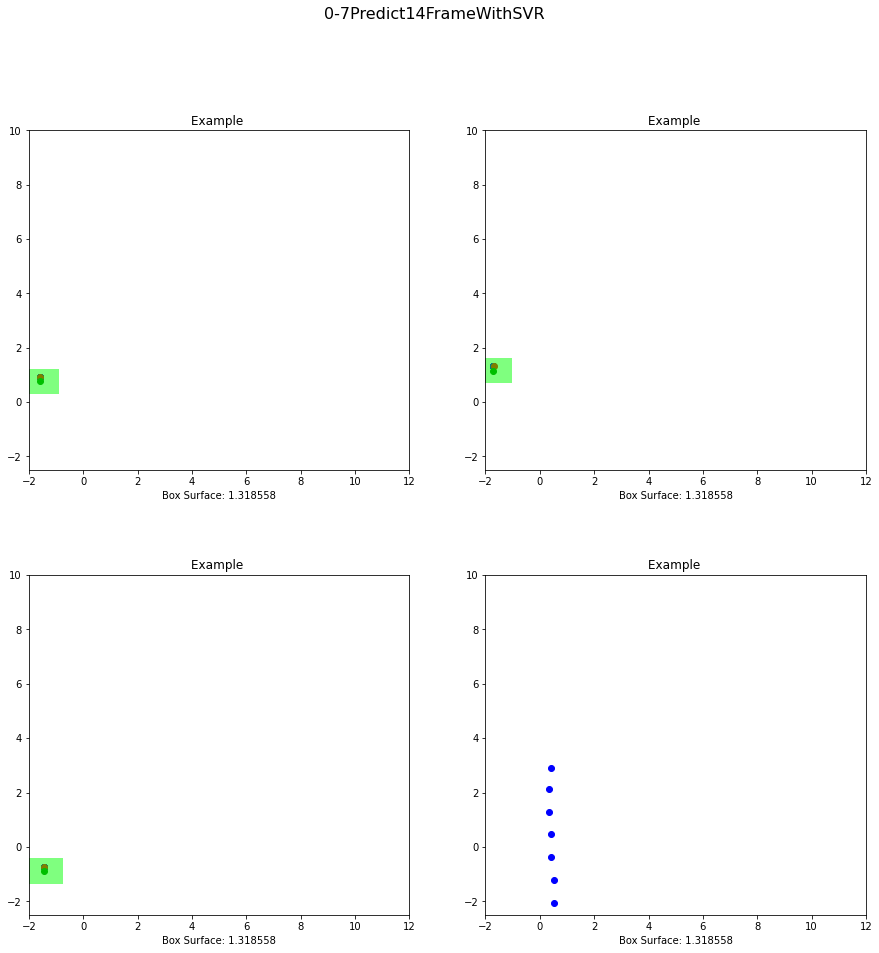

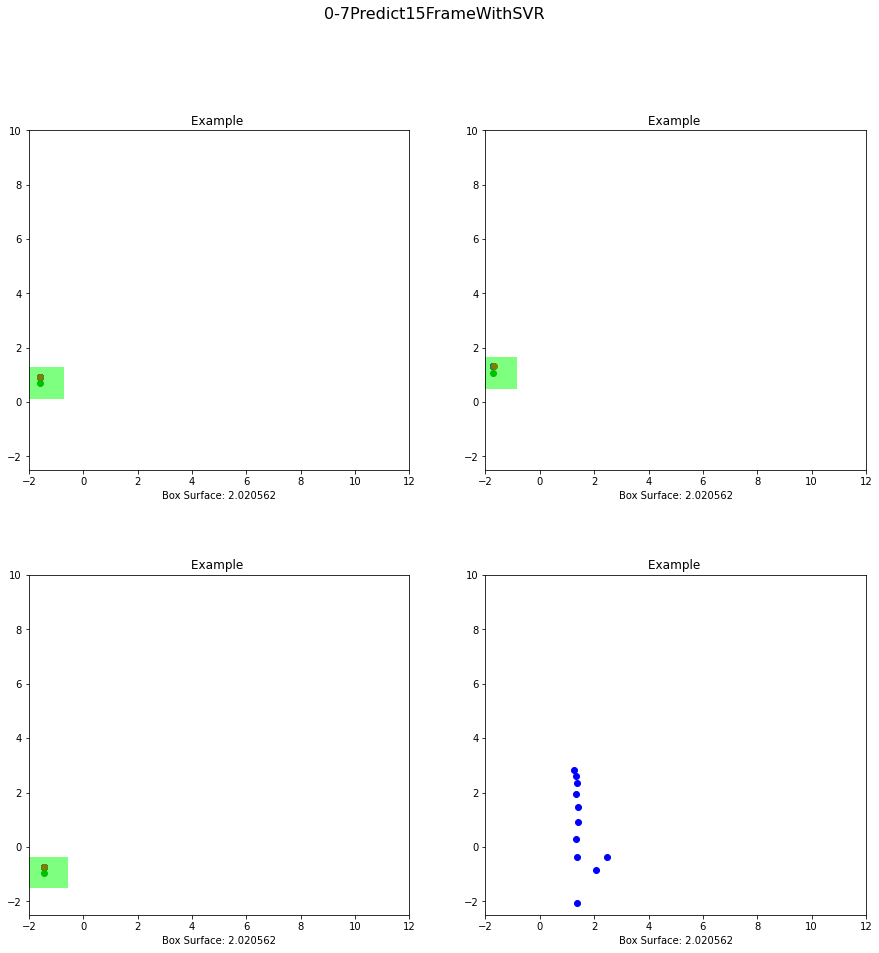

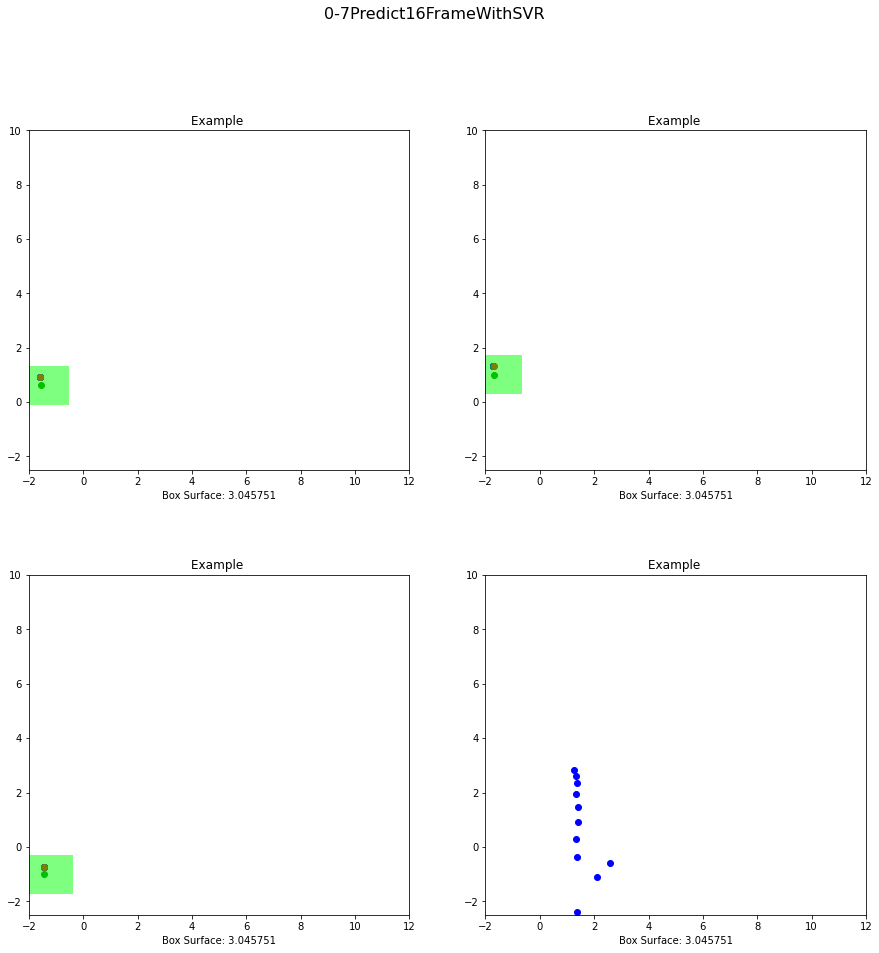

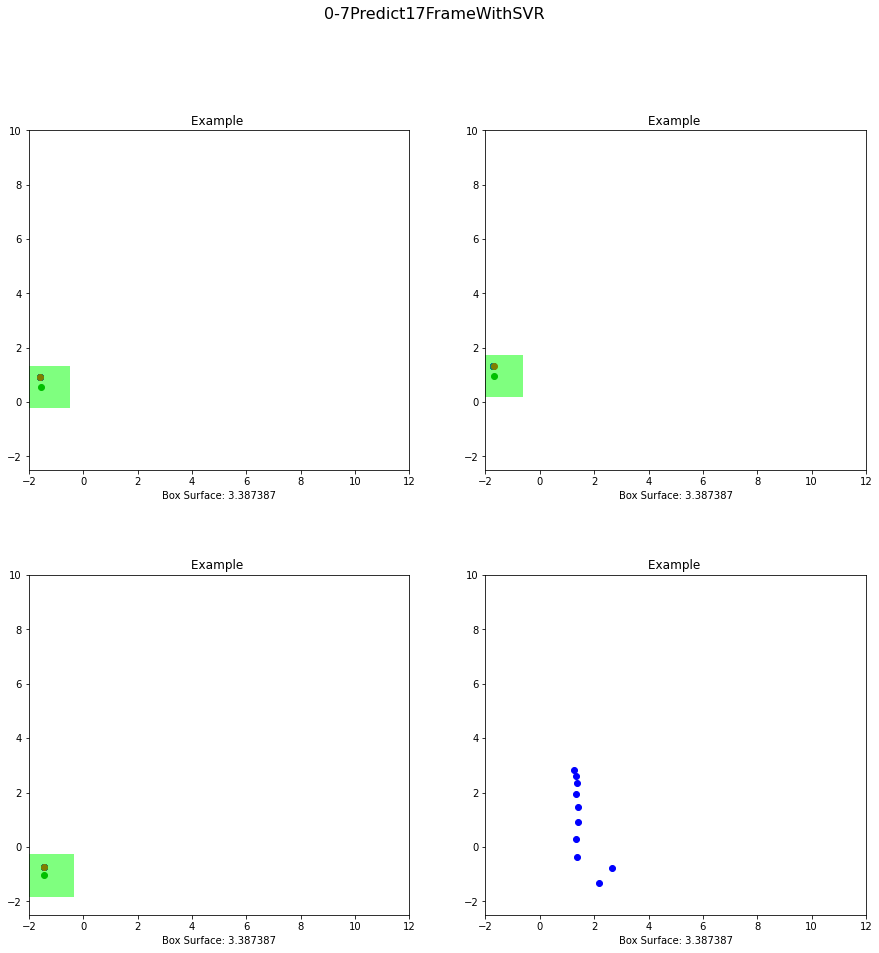

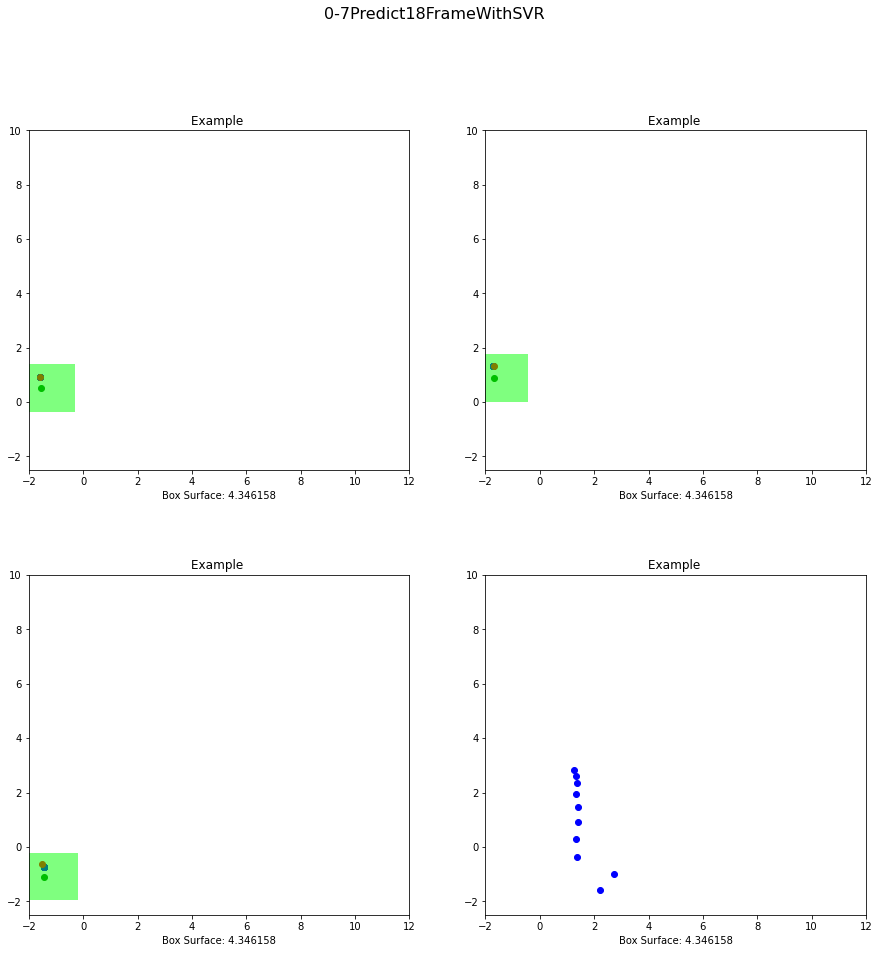

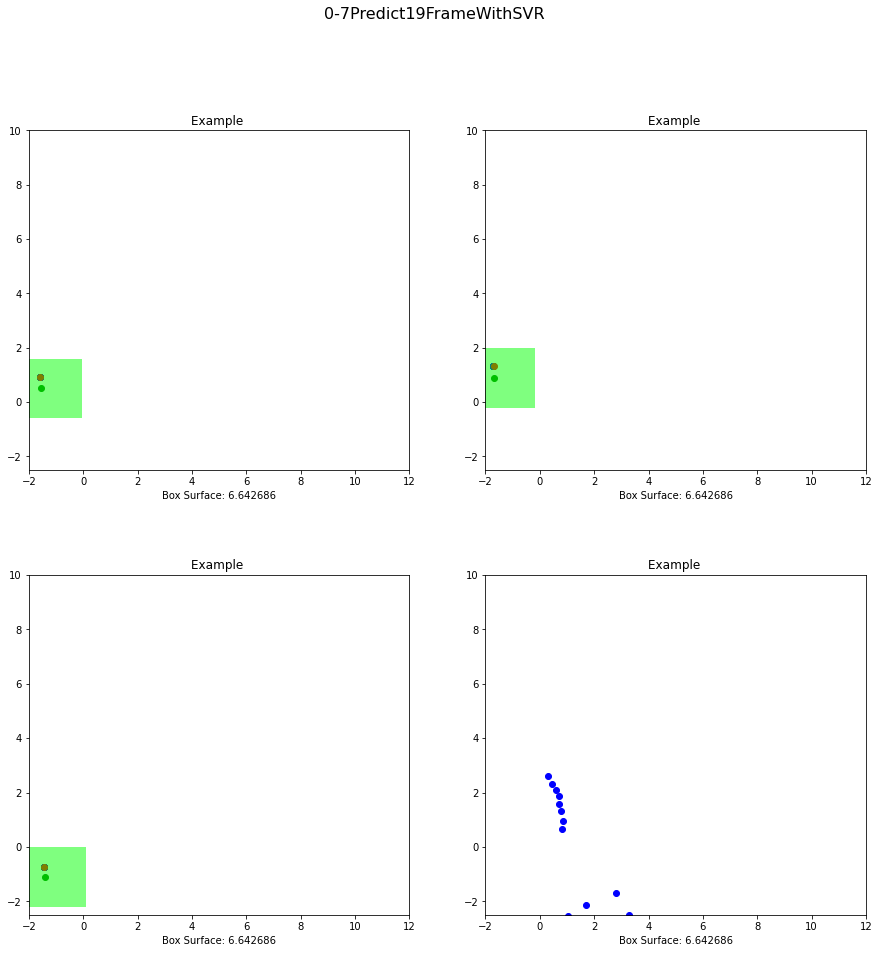

In [4]:
best_model_x_coor_list_lr_hotel,best_model_y_coor_list_lr_hotel,result_df_lr_hotel = get_best_model_list(trajs_hotel,train_range_pos,end_pred_pos,print_model=False,mode="LR",save_path="LR_Hotel/",print_traj=True)
best_model_x_coor_list_r_hotel,best_model_y_coor_list_r_hotel,result_df_r_hotel = get_best_model_list(trajs_hotel,train_range_pos,end_pred_pos,print_model=False,mode="Ridge",save_path="Ridge_Hotel/",print_traj=True)

In [33]:
def print_boxes(my_df, headline, row, save_path=None):
    try:
        col = math.ceil(my_df.shape[0]/row)
        if row < 2 or col < 2:
            raise ValueError("nr of rows and cols has to be at least 2")
        col = math.ceil(my_df.shape[0]/row)

        fig, axes = plt.subplots(row, col)
        fig.set_figheight(15)
        fig.set_figwidth(15)
        fig.tight_layout(pad=3.0, rect=[0, 0.03, 1, 0.95])
        fig.suptitle(headline, fontsize=16)
        for row_index, axe_row in enumerate(axes):

            for col_index, axe in enumerate(axe_row):

                current_index = len(axe_row)*row_index+col_index
                if current_index >= my_df.shape[0]:
                    break
                rect = matplotlib.patches.Rectangle((0, 0),
                                                    my_df["X-95"][current_index], my_df["Y-95"][current_index],
                                                    color='green')
                axe.set_aspect('equal', 'box')
                axe.set(xlim=(0, 3), ylim=(0, 3))
                axe.add_patch(rect)
                axe.set_xlabel("Box Surface: "+str("%.6f" %
                               my_df["Box Surface"][current_index]))
                calc_second = (current_index+1)*0.4
                axe.set_title("Second: "+str("%.2f" % calc_second) +
                              " "+my_df["Description"][current_index])

                axe.plot()
                if save_path is not None:
                    plt.savefig(save_path+headline+".pdf")
    except ValueError as err:
        print(err)

In [6]:
excel_file = "results_"+str(train_range_pos)+"_"+str(end_pred_pos)+".xlsx"

with pd.ExcelWriter(excel_file, mode="a", engine="openpyxl") as writer:
    result_df_lr.to_excel(writer, sheet_name="model_list_lr")
    result_df_r.to_excel(writer, sheet_name="model_list_r")
    result_df_lr_hotel.to_excel(writer, sheet_name="model_list_lr_hotel")
    result_df_r_hotel.to_excel(writer, sheet_name="model_list_r_hotel")

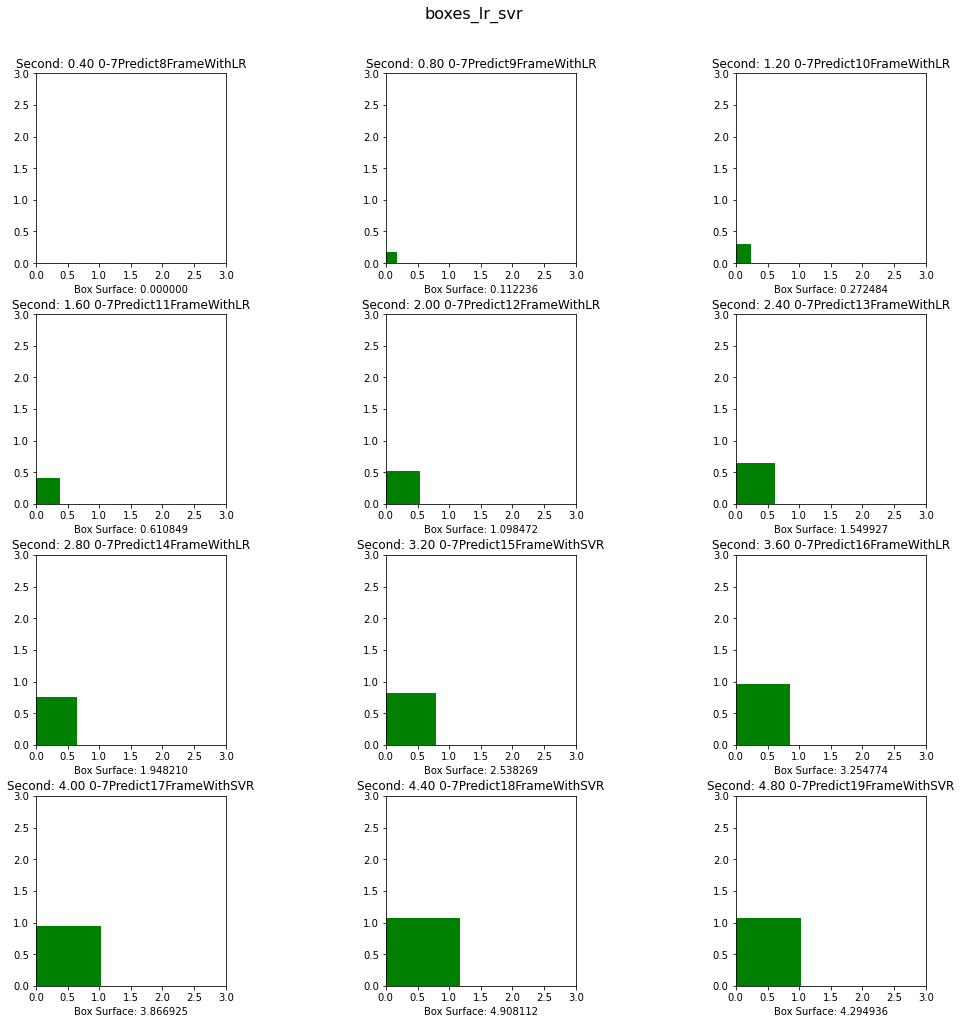

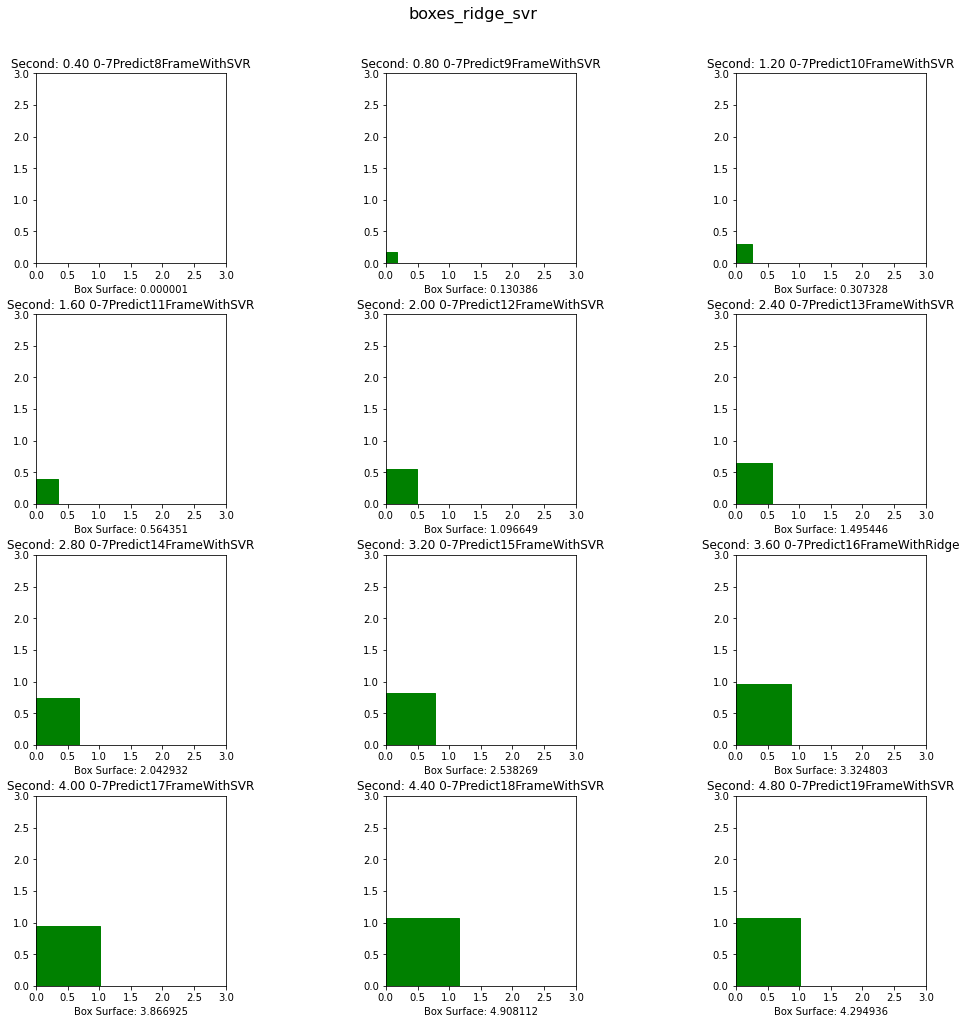

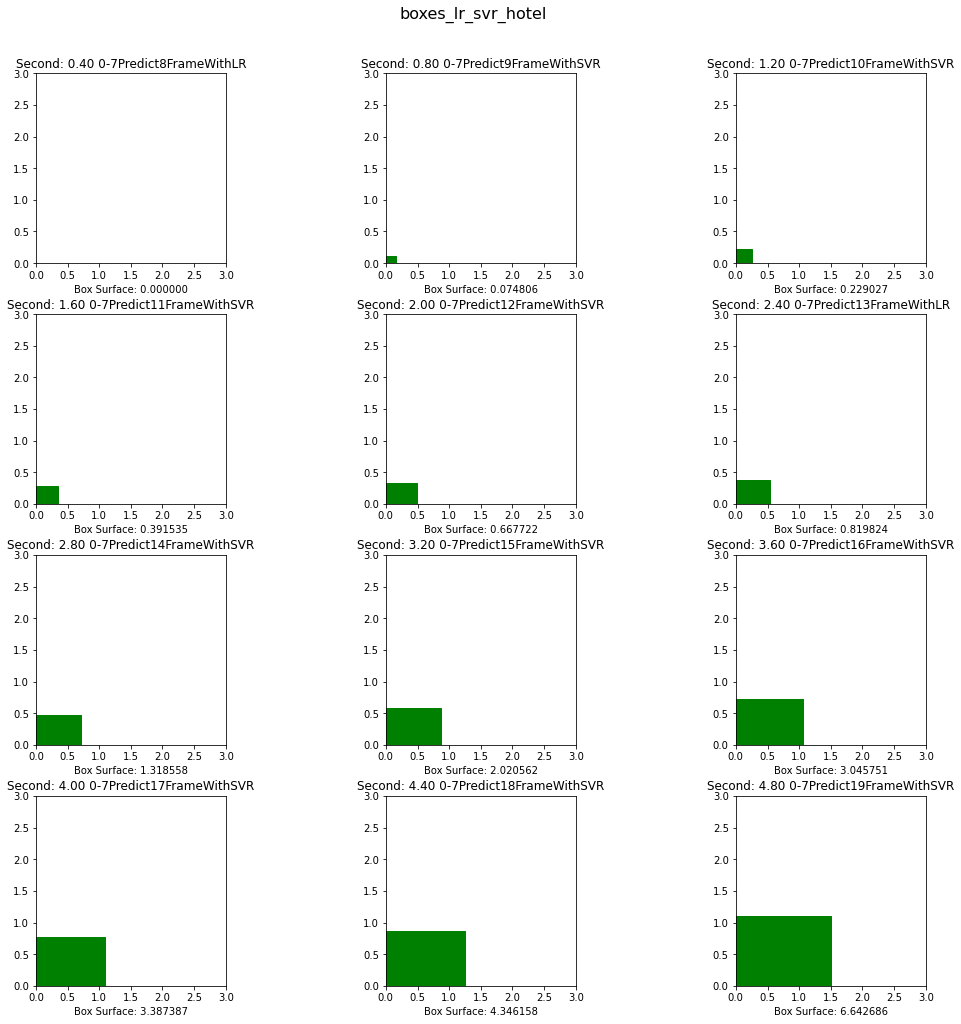

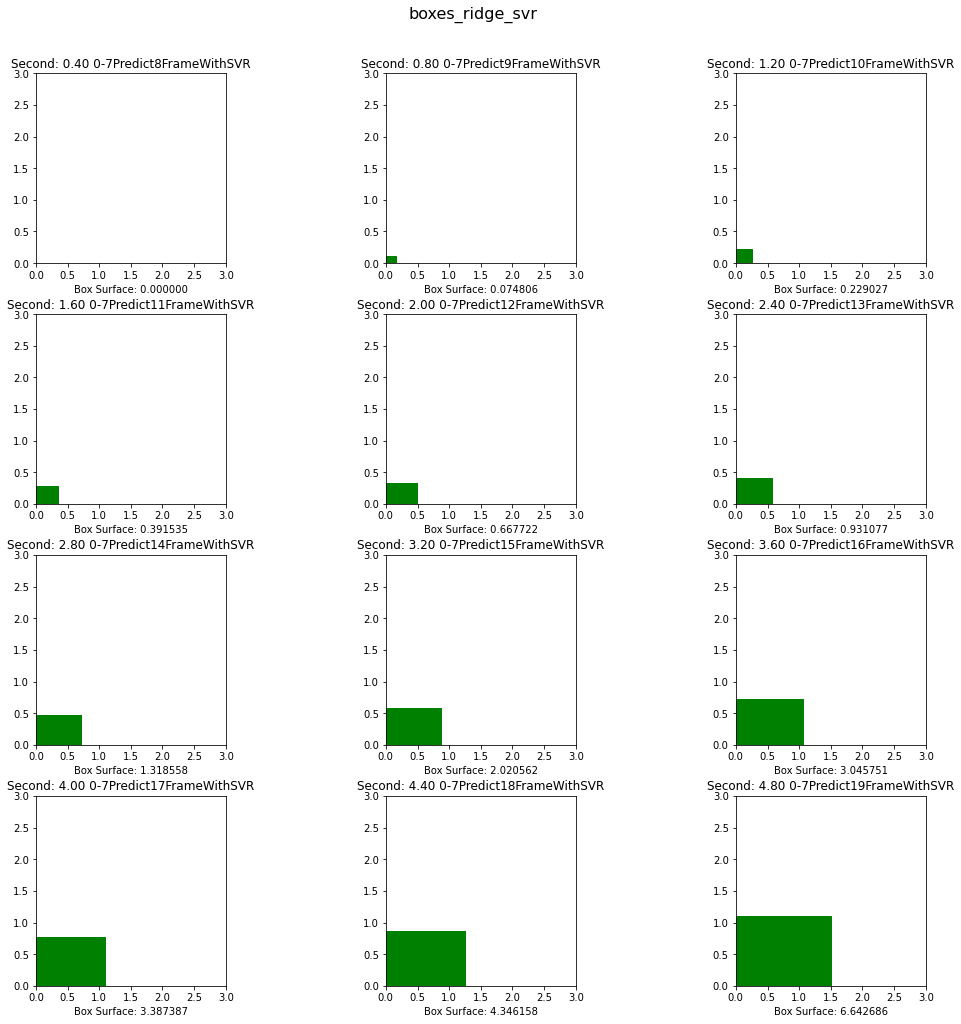

In [34]:
print_boxes(result_df_lr, "boxes_lr_svr", 4,"LR/")
print_boxes(result_df_r, "boxes_ridge_svr", 4,"Ridge/")
print_boxes(result_df_lr_hotel, "boxes_lr_svr_hotel", 4,"LR_Hotel/")
print_boxes(result_df_r_hotel, "boxes_ridge_svr", 4,"Ridge_Hotel/")